In [1]:
## Load data

In [2]:
import pickle
import pandas 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.formula.api as smf
import cmath



sns.set_context("poster", font_scale=1.1) ## poster format
sns.set_style("ticks")

# pickle.load( open( "C:\\Users\\David\\Desktop\\IDIBAPS\\Melanie_data\\df_corrected_Sa2.pickle", "rb" ) )

with open("C:\\Users\\David\\Desktop\\IDIBAPS\\Melanie_data\\df_corrected_Sa2.pickle", 'rb') as handle:
    df_dat = pickle.load(handle)

In [3]:
df_dat.head()

trial_id                                           sp_train  outcome  \
0         1    (19, 0)\t1.0\n  (45, 0)\t1.0\n  (39, 1)\t1.0...  CORRECT   
1         2    (43, 2)\t1.0\n  (73, 2)\t1.0\n  (121, 2)\t1....  CORRECT   
2         3    (7, 0)\t1.0\n  (26, 0)\t1.0\n  (4, 1)\t1.0\n...  CORRECT   
3         4    (2, 0)\t1.0\n  (30, 0)\t1.0\n  (69, 1)\t1.0\...  CORRECT   
4         5    (41, 0)\t1.0\n  (45, 0)\t1.0\n  (39, 3)\t1.0...  CORRECT   

                                    targ_xy  targ_angle  \
0  [-157.05952052691873, 65.05618350206528]        67.5   
1   [125.64761642153499, 52.04494680165221]       292.5   
2   [-104.08989360330435, -251.29523284307]       157.5   
3  [-125.647616421535, -52.044946801652195]       112.5   
4  [-91.0786569028913, -219.88332873768627]       157.5   

                                   saccade_xy  saccade_angle monkey  session  \
0     [-152.25114256858143, 67.7215398151819]      66.020429     Sa        2   
1     [125.82535896669323, 31.59868168533787]     284.097231     Sa        2   
2    [-84.57275017420879, -272.3301424858054]     162.747699     Sa        2   
3  [-153.00128219844342, -106.29518449569761]     124.789020     Sa        2   
4    [-80.74894038718212, -216.7699324910585]     159.569141     Sa        2   

   start    fix  targ_on  targ_off  go_cue  saccade  reward  trial_end  
0    1.0  259.0    472.0     892.0  3311.0   3491.0  3601.0       4380  
1    1.0  166.0    381.0     801.0  3221.0   3463.0  3572.0       4350  
2    1.0   74.0    291.0     711.0  2731.0   2916.0  3030.0       3809  
3    1.0   74.0    292.0     711.0  2931.0   3107.0  3212.0       3990  
4    1.0   74.0    291.0     711.0  2931.0   3109.0  3225.0       3999

In [4]:
np.shape(df_dat)
## 2407 trials

(2407, 17)

In [5]:
df_dat.iloc[100]

trial_id                                                       101
sp_train           (16, 0)\t1.0\n  (38, 0)\t1.0\n  (34, 1)\t1.0...
outcome                                                  BROKE_FIX
targ_xy                    [157.05952052691873, 65.05618350206527]
targ_angle                                                   292.5
saccade_xy                                                      []
saccade_angle                                                  NaN
monkey                                                          Sa
session                                                          2
start                                                            1
fix                                                             75
targ_on                                                        292
targ_off                                                       712
go_cue                                                        1862
saccade                                                       

In [6]:
np.array(df_dat['sp_train'].iloc[0].todense())

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [7]:
np.shape(df_dat['sp_train'].iloc[0].todense())
# (neurons, time)

(139, 4380)

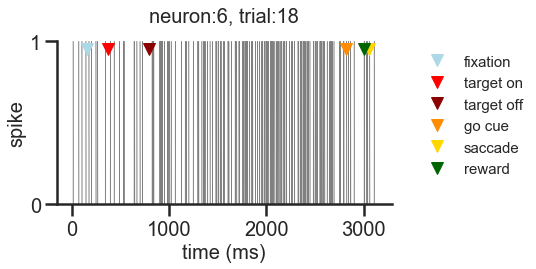

In [10]:
neuron_number=6
trial_number=18
plt.figure(figsize=(6,3))

n_x = np.array(df_dat['sp_train'].iloc[trial_number].todense())[neuron_number,:]
plt.plot(np.arange(1, len(n_x)+1,1), n_x, color='grey', linewidth=0.5)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='out') #direction
plt.ylabel('spike', fontsize=20)
plt.xlabel('time (ms)', fontsize=20)
plt.ylim(0,1)
plt.yticks([0,1]);
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.plot(df_dat['fix'].iloc[trial_number], 0.95, marker='v', linewidth=0, color='lightblue', label='fixation')
plt.plot(df_dat['targ_on'].iloc[trial_number], 0.95, marker='v', linewidth=0, color='red', label='target on')
plt.plot(df_dat['targ_off'].iloc[trial_number], 0.95, marker='v', linewidth=0, color='darkred', label='target off')
plt.plot(df_dat['go_cue'].iloc[trial_number], 0.95, marker='v', linewidth=0, color='darkorange', label='go cue')
plt.plot(df_dat['saccade'].iloc[trial_number], 0.95, marker='v', linewidth=0, color='gold', label='saccade')
plt.plot(df_dat['reward'].iloc[trial_number], 0.95, marker='v', linewidth=0, color='darkgreen', label='reward')

plt.legend(frameon=False, bbox_to_anchor=(1.05, 1), fontsize=15)
plt.title('neuron:' + str(neuron_number) + ', trial:' +str(trial_number), fontsize=20, pad=20);


In [11]:
df_dat.iloc[trial_number]

trial_id                                                        19
sp_train           (25, 0)\t1.0\n  (58, 0)\t1.0\n  (84, 0)\t1.0...
outcome                                                 BROKE_TARG
targ_xy                    [91.07865690289142, -219.8833287376862]
targ_angle                                                   202.5
saccade_xy                  [71.0076554168097, -291.4099898147229]
saccade_angle                                              193.694
monkey                                                          Sa
session                                                          2
start                                                            1
fix                                                            158
targ_on                                                        373
targ_off                                                       793
go_cue                                                        2813
saccade                                                       

In [12]:
df_dat['saccade'].iloc[trial_number]

3053.0

In [13]:
df_dat['reward'].iloc[trial_number]

3005.0

In [14]:
radius = []
radius_mod=[]

for i in range(len(df_dat)):
    x, y = df_dat.iloc[i].targ_xy
    mod =  int(np.sqrt((x**2 + y**2))) 
    if mod==136:
        radius.append('r1')
        radius_mod.append(136)
    elif (mod==169) or (mod==170) :
        radius.append('r2')
        radius_mod.append(170)
    elif mod==204:
        radius.append('r3')
        radius_mod.append(204)
    elif (mod==237) or (mod==238):
        radius.append('r4')
        radius_mod.append(238)
    elif mod==272:
        radius.append('r5')
        radius_mod.append(270)
####
df_dat['radius'] = radius
## distance between radius is constant (34)
df_dat['radius_mod'] = radius_mod



In [15]:
lens_ = [len(df_dat.loc[df_dat['radius']==r]) for r in ['r1', 'r2', 'r3', 'r4', 'r5']]
lens_

[517, 511, 300, 570, 509]

In [16]:
## 8 possible angle locations
df_dat.targ_angle.unique()

array([ 67.5, 292.5, 157.5, 112.5, 247.5, 202.5, 337.5,  22.5])

In [17]:
### Firing rates

In [18]:
## Count spikes in a certain windows 
#   https://neuronaldynamics.epfl.ch/online/Ch7.S2.html#:~:text=The%20firing%20rate%20in%20trial,k%3DnspkT.&text=The%20length%20T%20of%20the,occur%20within%20the%20time%20window.

![](fr_IMG.PNG)

In [21]:
 df_dat['targ_on'].iloc[trial_number]
df_dat['targ_off'].iloc[trial_number]

803.0

In [22]:
# firing rate during stimulus presentation (example of one neuron in one trial) 
trial_number=10
neuron_number=8
n_x = np.array(df_dat['sp_train'].iloc[trial_number].todense())[neuron_number,:]
idx_target_on = int( df_dat['targ_on'].iloc[trial_number] - 1 ) ## one starts at 0 and the other at 1
idx_target_off = int(df_dat['targ_off'].iloc[trial_number] -1 )
time_target_off = df_dat['targ_off'].iloc[trial_number]
time_target_on = df_dat['targ_on'].iloc[trial_number]
sps_stimpres = np.sum(n_x[idx_target_on:idx_target_off])/ (time_target_off - time_target_on)
sps_stimpres

0.004761904761904762

In [23]:
### firing rate for each neuron in each trial for both stimulus presentation and delay period
### I used the fr of stim pres in the other paper

frames=[]

for trial_number in range(len(df_dat)):
    r = df_dat.iloc[trial_number].radius
    r_mod = df_dat.iloc[trial_number].radius_mod
    ang =  df_dat.iloc[trial_number].targ_angle
    outcome =  df_dat.iloc[trial_number].outcome
    for neuron_number in range(139): #always 139 neurons
        n_x = np.array(df_dat['sp_train'].iloc[trial_number].todense())[neuron_number,:]
        ####
        time_target_off = df_dat['targ_off'].iloc[trial_number]
        time_target_on = df_dat['targ_on'].iloc[trial_number]
        idx_target_on = int( df_dat['targ_on'].iloc[trial_number] - 1 ) ## one starts at 0 and the other at 1
        idx_target_off = int(df_dat['targ_off'].iloc[trial_number] -1 )
        sps_stimpres = np.sum(n_x[idx_target_on:idx_target_off])/ (time_target_off - time_target_on)
        ####
        idx_gocue = int( df_dat['go_cue'].iloc[trial_number] - 1 ) ## one starts at 0 and the other at 1
        sps_delay = np.sum(n_x[idx_target_off:idx_gocue])/ (idx_gocue - time_target_off)
        ####
        ####
        frames.append([sps_stimpres, sps_delay, r, r_mod, ang, outcome, trial_number, neuron_number])
        

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in double_scalars


In [24]:
df=pd.DataFrame(frames)
df.columns=['spms_stimpres', 'spms_delay', 'radius', 'radius_mod', 'angle', 'outcome', 'trial', 'neuron_id']
df.head()

spms_stimpres  spms_delay radius  radius_mod  angle  outcome  trial  \
0       0.004762    0.002068     r2         170   67.5  CORRECT      0   
1       0.030952    0.019851     r2         170   67.5  CORRECT      0   
2       0.026190    0.039702     r2         170   67.5  CORRECT      0   
3       0.030952    0.020678     r2         170   67.5  CORRECT      0   
4       0.061905    0.032258     r2         170   67.5  CORRECT      0   

   neuron_id  
0          0  
1          1  
2          2  
3          3  
4          4

In [206]:
###df.to_excel('C:\\Users\\David\\Desktop\\IDIBAPS\\Melanie_data\\df_spms.xlsx')
df=pd.read_excel('C:\\Users\\David\\Desktop\\IDIBAPS\\Melanie_data\\df_spms.xlsx')

In [240]:
df['sps_stimpres'] = df['spms_stimpres']*1000
df['sps_delay'] = df['spms_delay']*1000

In [220]:
poss_outcomes = ['CORRECT', 'BROKE_FIX', 'IGNORED', 'NO_CHOICE', 'BROKE_TARG']
[len(df_dat.loc[df_dat['outcome']==x]) for x in poss_outcomes]

[780, 476, 1009, 75, 67]

In [242]:
###just use the correct (although some other (like ignore could also be used!))
df_c = df.loc[df['outcome']=='CORRECT']
len(df_c)

108420

In [243]:
#### Select neurons with tuning

In [491]:
sp_time = 'sps_stimpres' #'sps_delay'

In [492]:
### Mejor ir radio a radio y solo descartar cuando no hay selectivity en ninguno!
### Despues cojer las selectivas en cada radio (max tuning en un radio y hace la circ std. No de cada una en todos los radius)
### ya que si tenemos mas represneted fuera (en numeor de neurons, lo normal es lo que nos hemos encontrado)
### tambien podría explicar lo contrario

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'tuning neuron: 0')

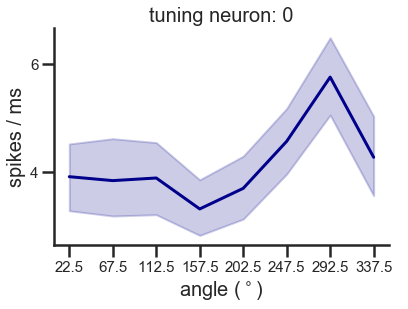

In [494]:
neuron_ = 0

sns.lineplot(x='angle', y=sp_time, color='darkblue', data=df_c.loc[df_c['neuron_id']==neuron_])
plt.xticks(df_c.angle.unique(), fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('spikes / ms', fontsize=20)
plt.xlabel('angle ($^\circ$)',  fontsize=20)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='out') #direction
plt.title('tuning neuron: ' + str(neuron_), fontsize=20)

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


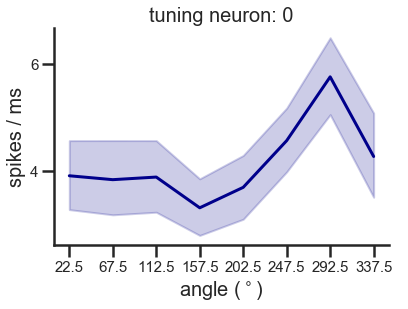

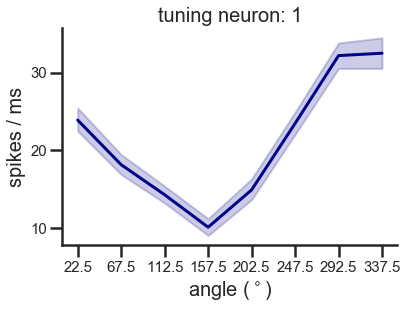

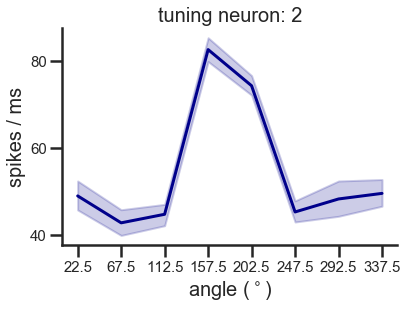

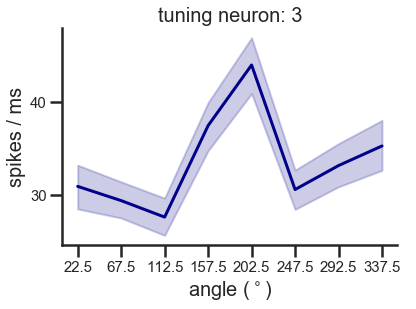

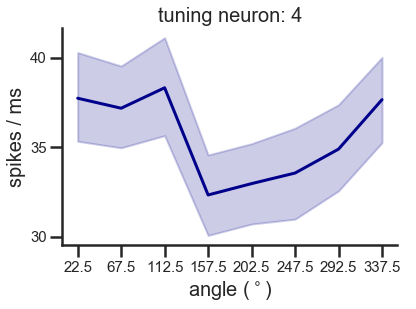

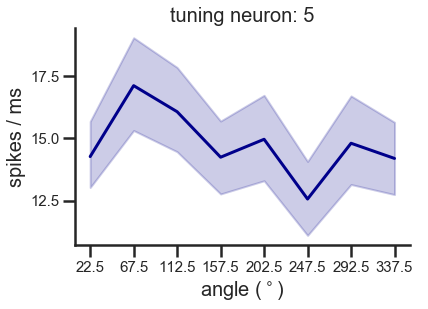

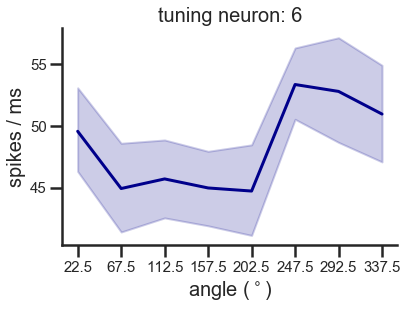

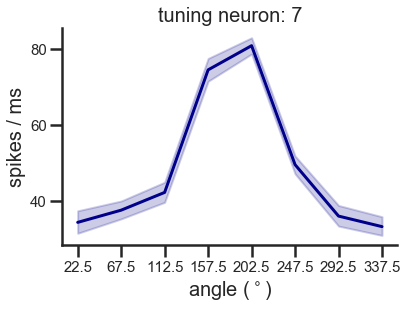

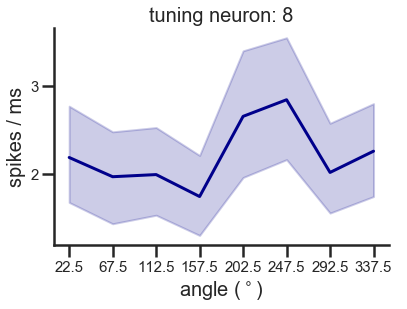

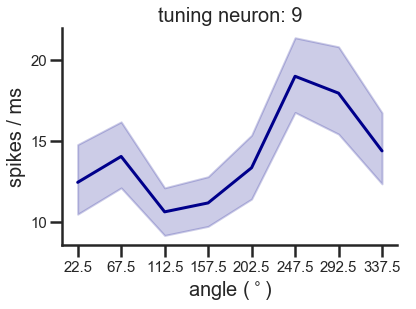

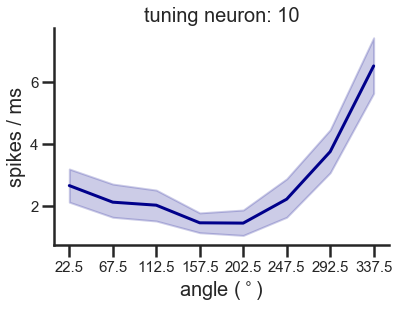

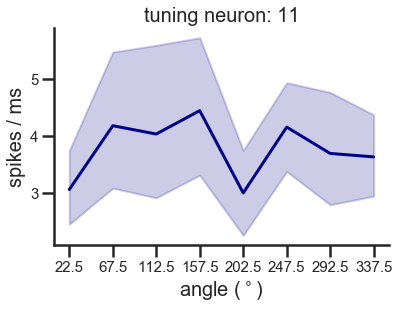

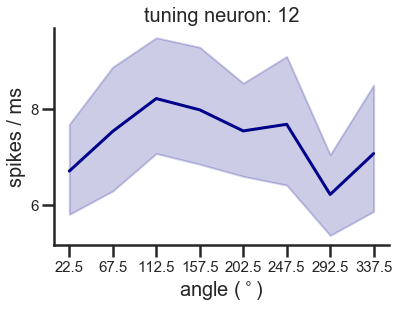

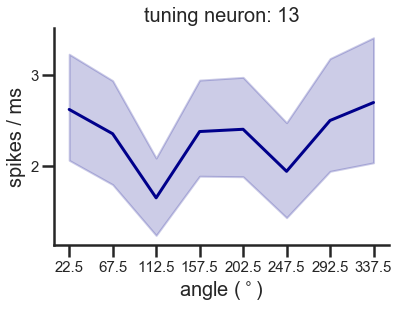

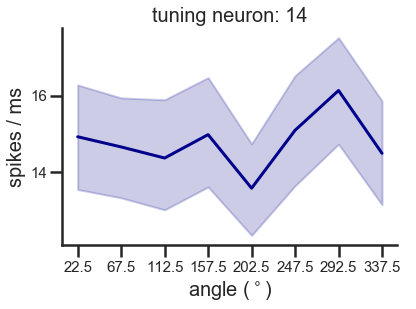

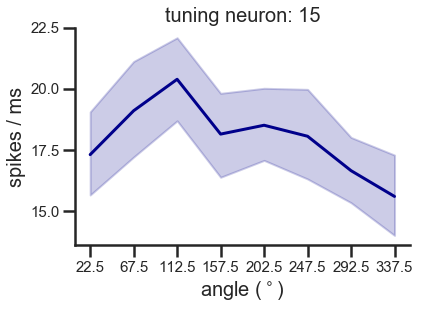

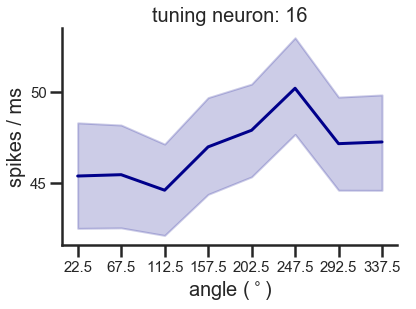

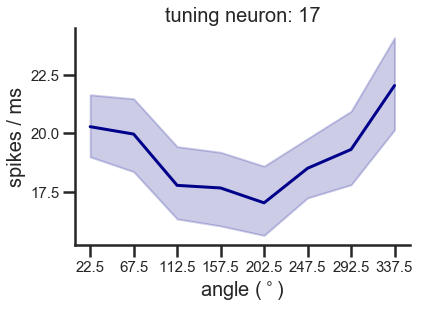

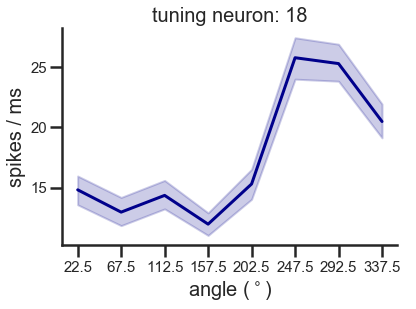

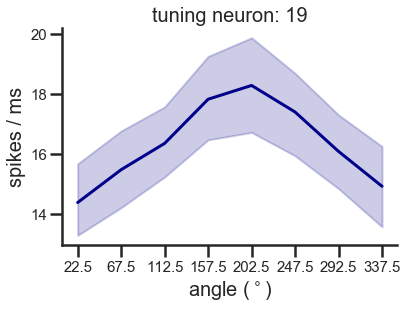

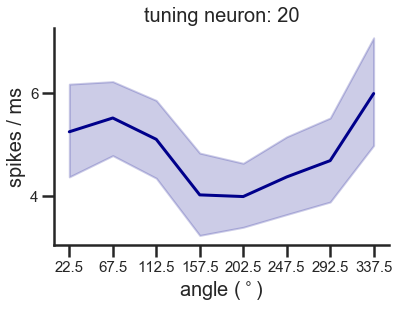

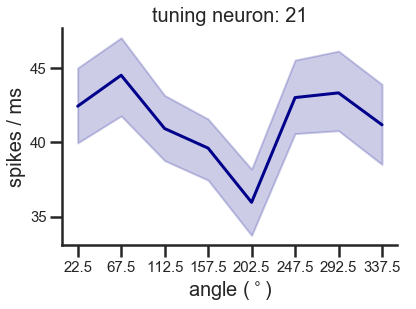

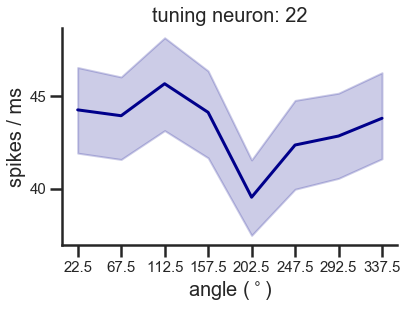

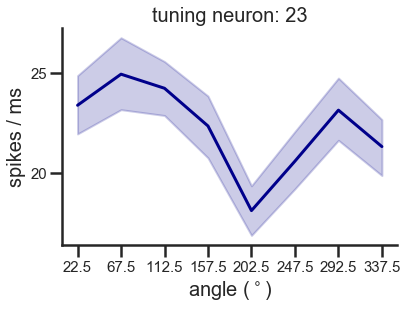

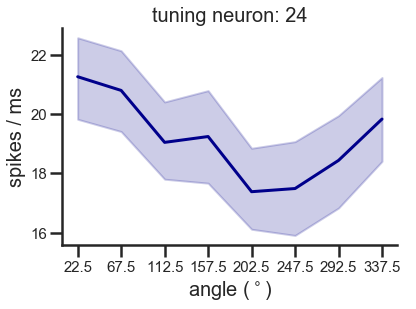

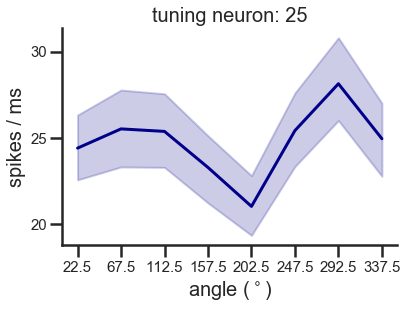

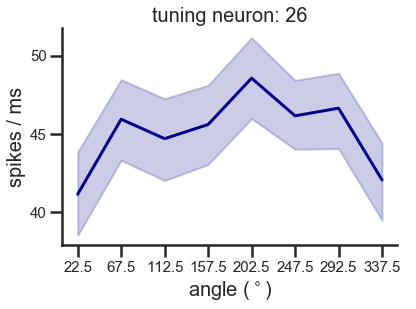

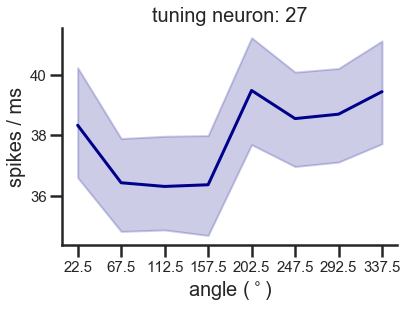

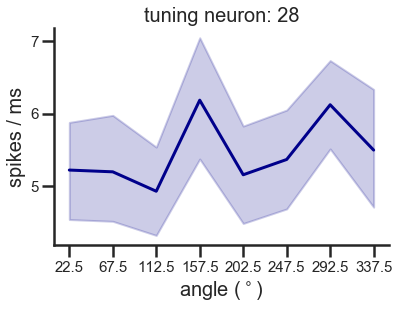

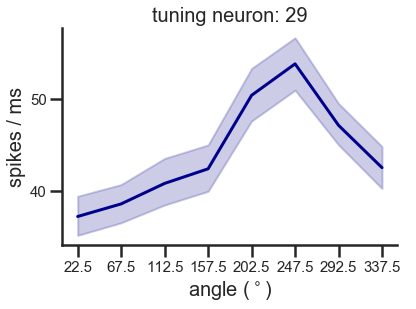

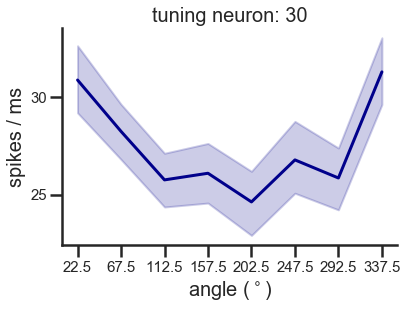

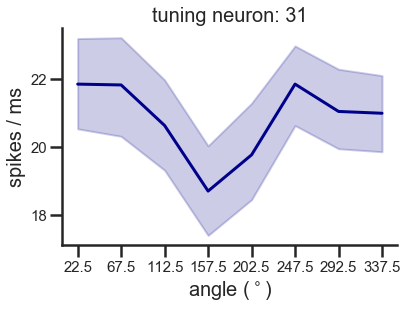

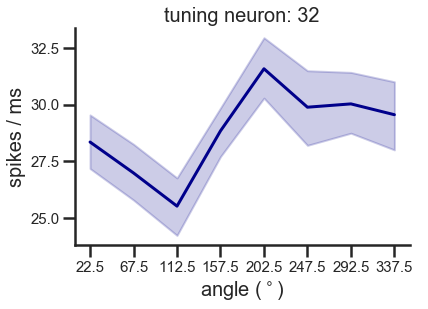

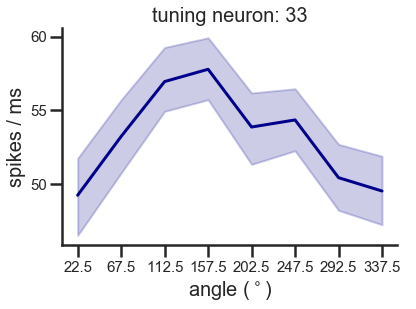

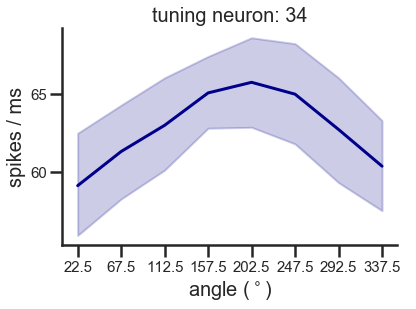

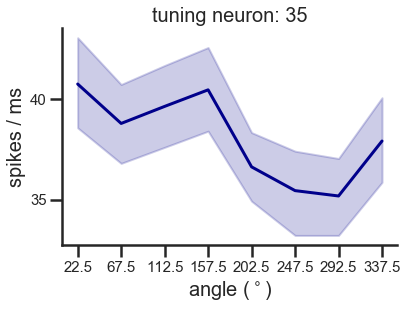

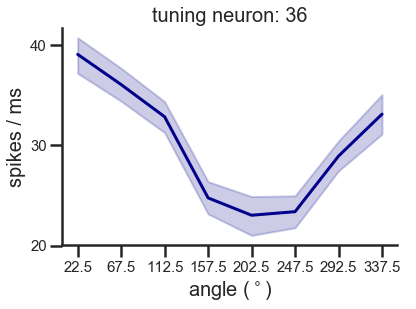

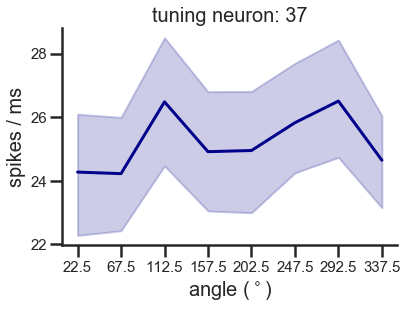

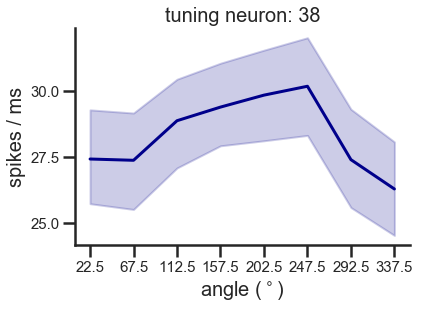

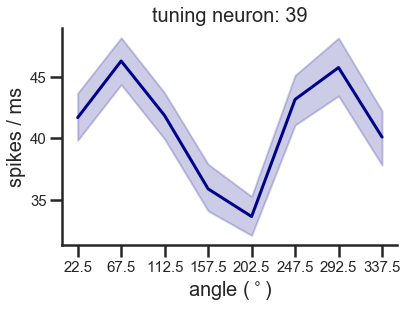

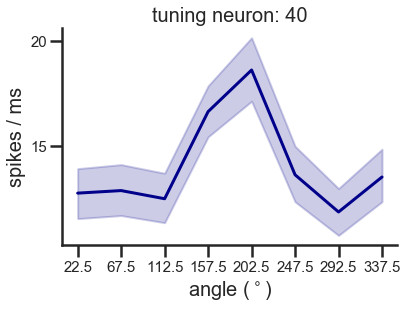

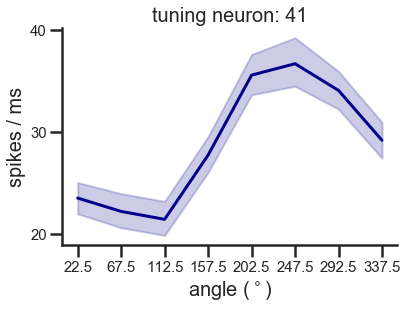

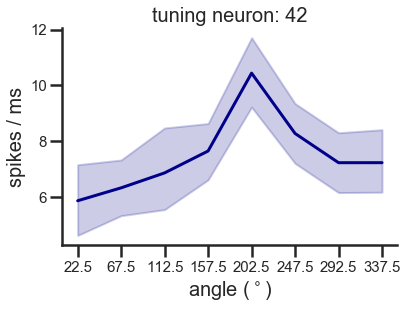

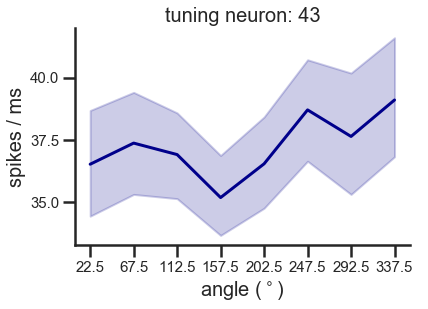

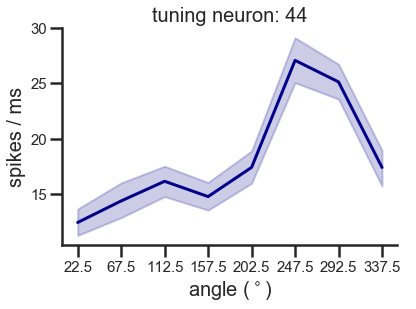

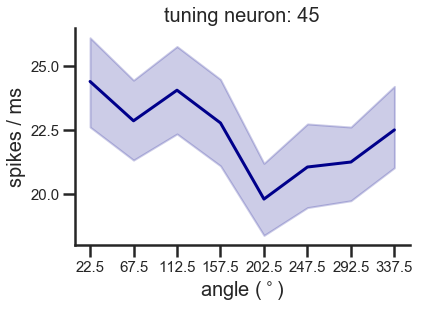

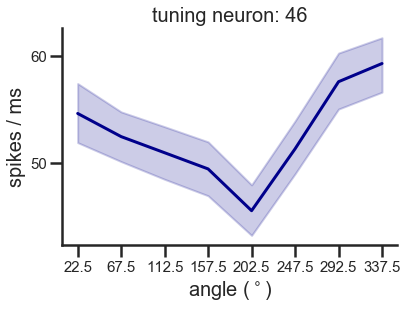

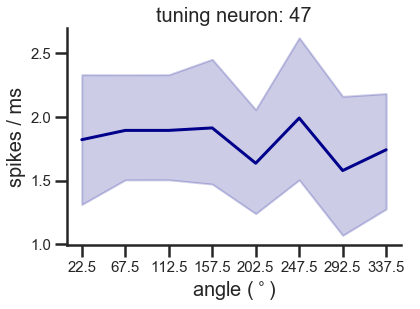

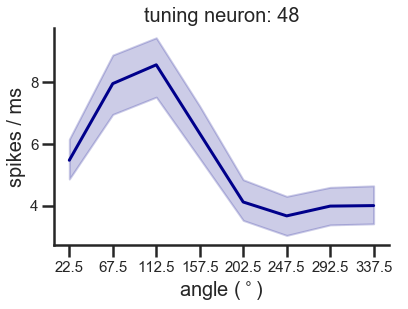

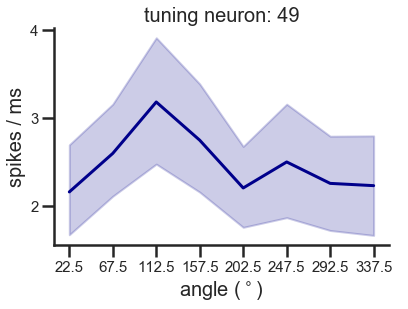

In [495]:
for n in range(50):
    plt.figure()
    sns.lineplot(x='angle', y=sp_time, color='darkblue', data=df_c.loc[df_c['neuron_id']==n])
    plt.xticks(df_c.angle.unique(), fontsize=15)
    plt.yticks(fontsize=15)
    plt.ylabel('spikes / ms', fontsize=20)
    plt.xlabel('angle ($^\circ$)',  fontsize=20)
    plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
    plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
    plt.gca().get_xaxis().tick_bottom()                                                                                         
    plt.gca().get_yaxis().tick_left()
    plt.gca().tick_params(direction='out') #direction
    plt.title('tuning neuron: ' + str(n), fontsize=20)
    plt.show()

                            OLS Regression Results                            
Dep. Variable:           sps_stimpres   R-squared:                       0.476
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     100.3
Date:                Fri, 14 May 2021   Prob (F-statistic):          5.11e-104
Time:                        19:31:43   Log-Likelihood:                -3206.6
No. Observations:                 780   AIC:                             6429.
Df Residuals:                     772   BIC:                             6466.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            49.0039      1.49

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


True

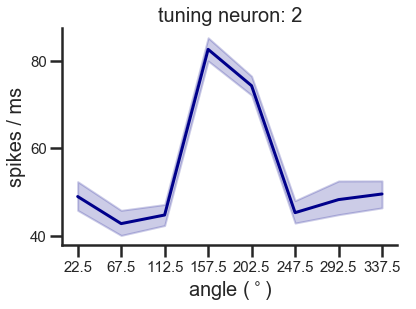

In [496]:
neuron_ = 2

sns.lineplot(x='angle', y=sp_time, color='darkblue', data=df_c.loc[df_c['neuron_id']==neuron_])
plt.xticks(df_c.angle.unique(), fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('spikes / ms', fontsize=20)
plt.xlabel('angle ($^\circ$)',  fontsize=20)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='out') #direction
plt.title('tuning neuron: ' + str(neuron_), fontsize=20)


result = smf.ols(formula=sp_time +'~ C(angle)', data=df_c.loc[df_c['neuron_id']==2]).fit()
print(result.summary())
p_vals = [result.pvalues[i] for i in range(len(df_c.angle.unique() ))][1:] ## no intercept
print(p_vals)
sum(np.array(p_vals)<0.05)>0

In [497]:
neurons_with_angular_tuning=[]

for n in df_c.neuron_id.unique():
    result = smf.ols(formula=sp_time +' ~ C(angle)', data=df_c.loc[df_c['neuron_id']==n]).fit()
    p_vals = [result.pvalues[i] for i in range(len(df_c.angle.unique() ))][1:] ## no intercept
    if sum(np.array(p_vals)<0.05)>0: ## check if there is any significant. 
        neurons_with_angular_tuning.append(n) #If it is, save the neuron

##
len(neurons_with_angular_tuning)

113

In [498]:
### subset with tuning (subset of correct too)
df_t = df_c.loc[df_c['neuron_id'].isin(neurons_with_angular_tuning) ]
len(df_t.neuron_id.unique())

113

In [499]:
df_t.head()

spms_stimpres  spms_delay radius  radius_mod  angle  outcome  trial  \
0       0.004762    0.001994     r2         170   67.5  CORRECT      0   
1       0.030952    0.019139     r2         170   67.5  CORRECT      0   
2       0.026190    0.038278     r2         170   67.5  CORRECT      0   
3       0.030952    0.019936     r2         170   67.5  CORRECT      0   
4       0.061905    0.031100     r2         170   67.5  CORRECT      0   

   neuron_id  sps_stimpres  sps_delay  
0          0      4.761905   1.993620  
1          1     30.952381  19.138756  
2          2     26.190476  38.277512  
3          3     30.952381  19.936204  
4          4     61.904762  31.100478

In [500]:
#### Population vector of each neuron

182.37975688026933
182.7856919058537


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


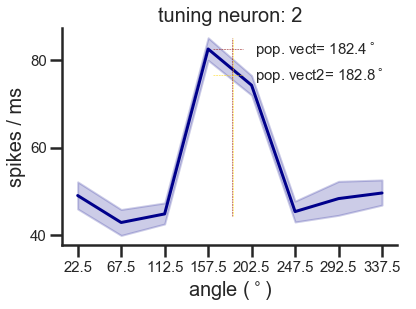

In [501]:
neuron_ = 2

sns.lineplot(x='angle', y=sp_time, color='darkblue', data=df_t.loc[df_t['neuron_id']==neuron_])
plt.xticks(df_t.angle.unique(), fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('spikes / ms', fontsize=20)
plt.xlabel('angle ($^\circ$)',  fontsize=20)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='out') #direction
plt.title('tuning neuron: ' + str(neuron_), fontsize=20)


# #### population vector1 (all)
angles_rad = df_t.loc[df_t['neuron_id']==neuron_, 'angle'].values
angles_rad = np.radians(angles_rad)
sps_stimp = df_t.loc[df_t['neuron_id']==neuron_, sp_time].values

R = np.sum(np.dot(sps_stimp, np.exp(1j*angles_rad)))/np.sum(sps_stimp)
angle_decoded = np.degrees(np.angle(R))

if angle_decoded<0:
        angle_decoded = 360+angle_decoded

        
print(angle_decoded) 

#### population vector2 (mean of 8 positions)
angles = df_t.loc[df_t['neuron_id']==neuron_, 'angle'].unique()
sps_stimp = [df_t.loc[(df_t['neuron_id']==neuron_) & (df_t['angle']==angle_x) , sp_time].mean() for angle_x in angles]

angles_rad = np.radians(angles)
sps_stimp = np.array(sps_stimp)
             
R = np.sum(np.dot(sps_stimp, np.exp(1j*angles_rad)))/np.sum(sps_stimp)
angle_decoded2 = np.degrees(np.angle(R))

if angle_decoded2<0:
        angle_decoded2 = 360+angle_decoded2
       
        
print(angle_decoded2)        
              
        

inf, sup= [df_t.loc[df_t['neuron_id']==neuron_][sp_time].mean()- 0.5*df_t.loc[df_t['neuron_id']==neuron_][sp_time].std(), 
 df_t.loc[df_t['neuron_id']==neuron_][sp_time].mean()+ 1.5*df_t.loc[df_t['neuron_id']==neuron_][sp_time].std()]        
        
plt.plot([angle_decoded, angle_decoded], [inf, sup], color='darkred', 
         linestyle='--', linewidth=0.5, 
         label= 'pop. vect= '+ str(round(angle_decoded,1)) + '$^\circ$' )

plt.plot([angle_decoded2, angle_decoded2], [inf, sup], color='gold', 
         linestyle='--', linewidth=0.5, 
         label= 'pop. vect2= '+ str(round(angle_decoded2,1)) + '$^\circ$' )


plt.legend(loc=1,frameon=False, fontsize=15)


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


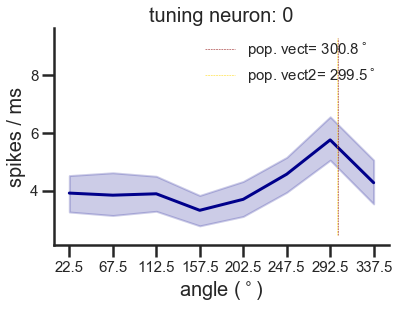

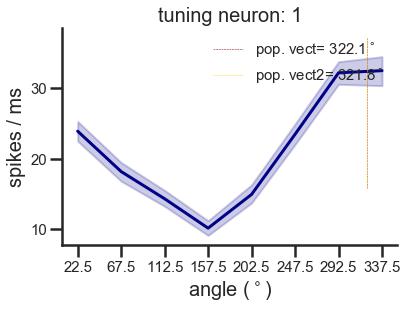

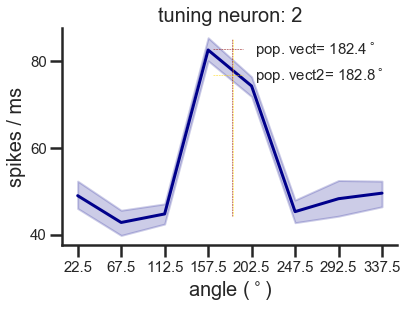

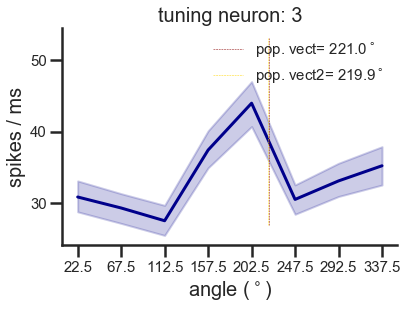

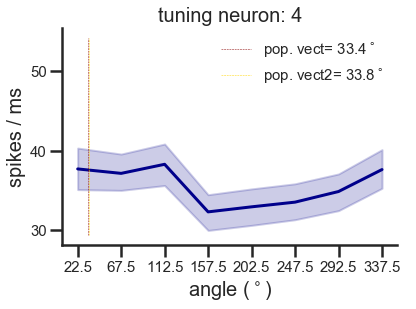

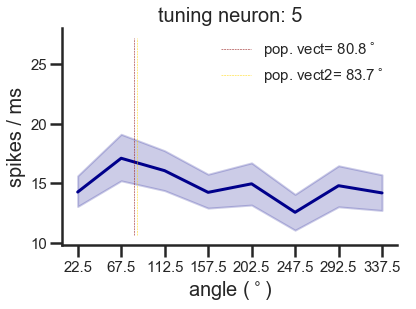

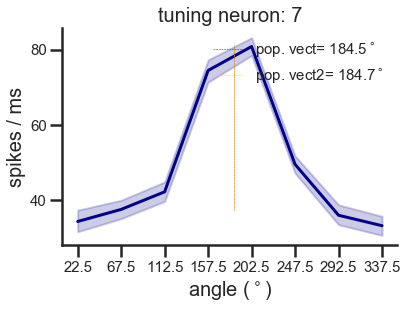

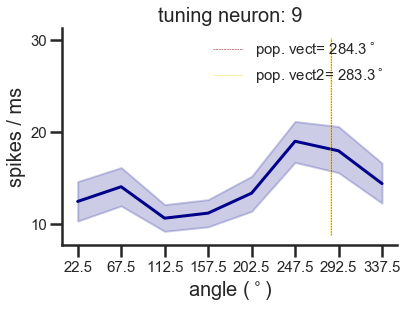

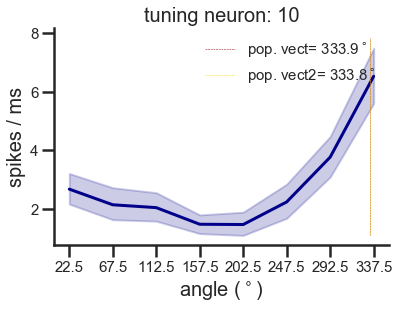

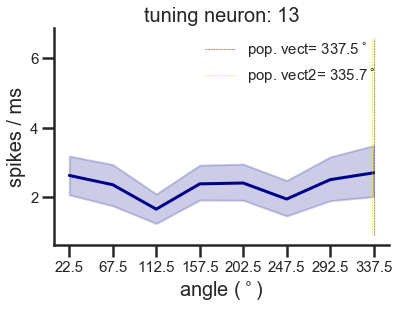

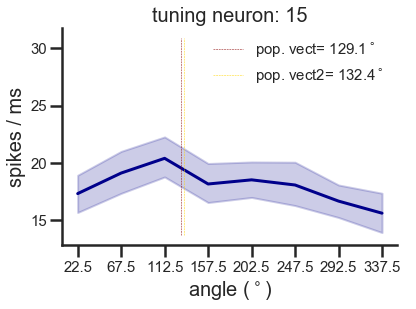

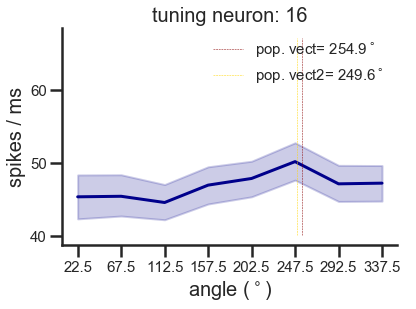

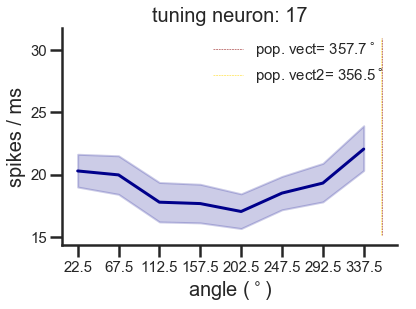

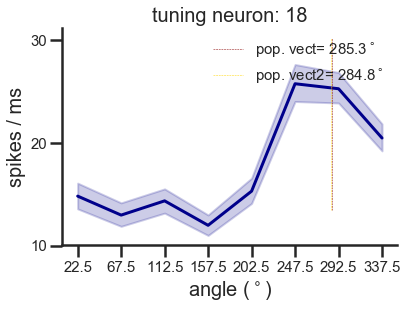

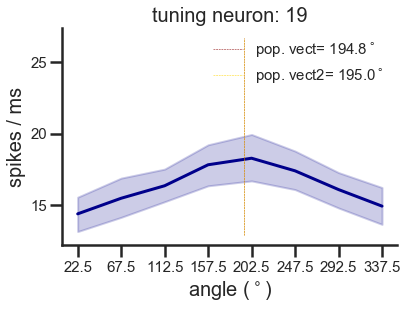

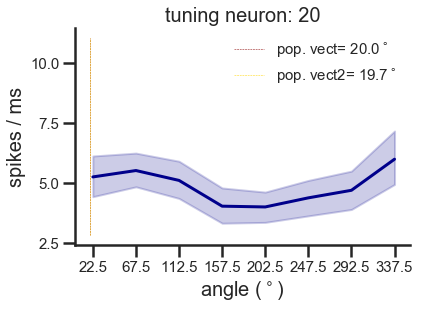

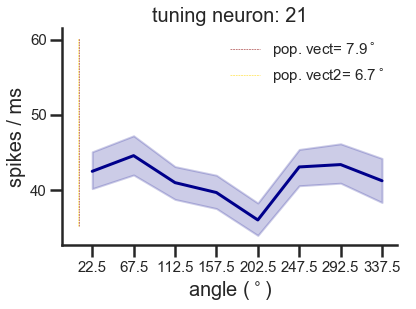

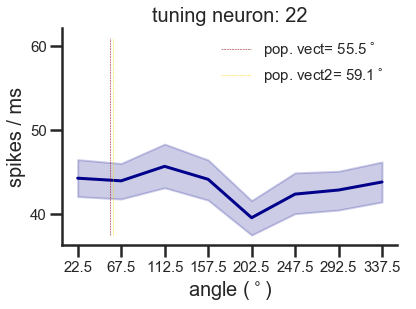

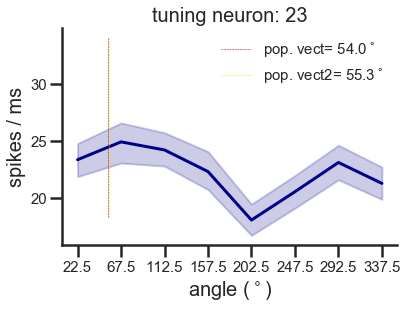

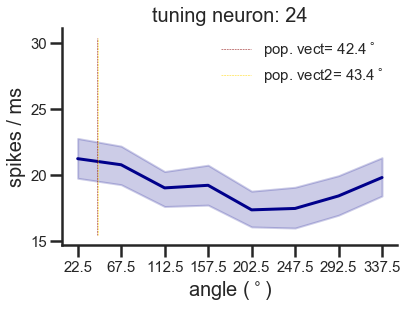

In [507]:
for n in df_t.neuron_id.unique()[:20]:
    plt.figure()
    sns.lineplot(x='angle', y=sp_time, color='darkblue', data=df_t.loc[df_t['neuron_id']==n])
    plt.xticks(df_t.angle.unique(), fontsize=15)
    plt.yticks(fontsize=15)
    plt.ylabel('spikes / ms', fontsize=20)
    plt.xlabel('angle ($^\circ$)',  fontsize=20)
    plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
    plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
    plt.gca().get_xaxis().tick_bottom()                                                                                         
    plt.gca().get_yaxis().tick_left()
    plt.gca().tick_params(direction='out') #direction
    plt.title('tuning neuron: ' + str(n), fontsize=20)


    #### population vector (all data together)
    angles_rad = df_t.loc[df_t['neuron_id']==n, 'angle'].values
    angles_rad = np.radians(angles_rad)
    sps_stimp = df_t.loc[df_t['neuron_id']==n, sp_time].values

    R = np.sum(np.dot(sps_stimp, np.exp(1j*angles_rad)))/np.sum(sps_stimp)
    angle_decoded = np.degrees(np.angle(R))

    if angle_decoded<0:
            angle_decoded = 360+angle_decoded
            
    #### population vector2 (mean of all 8 positions and with the 8)
    angles = df_t.loc[df_t['neuron_id']==n, 'angle'].unique()
    sps_stimp = [df_t.loc[(df_t['neuron_id']==n) & (df_t['angle']==angle_x) , sp_time].mean() for angle_x in angles]

    angles_rad = np.radians(angles)
    sps_stimp = np.array(sps_stimp)

    R = np.sum(np.dot(sps_stimp, np.exp(1j*angles_rad)))/np.sum(sps_stimp)
    angle_decoded2 = np.degrees(np.angle(R))

    if angle_decoded2<0:
            angle_decoded2 = 360+angle_decoded2
    
    
    ###############
    

    inf, sup= [df_t.loc[df_t['neuron_id']==n][sp_time].mean()- 0.5*df_t.loc[df_t['neuron_id']==n][sp_time].std(), 
     df_t.loc[df_t['neuron_id']==n][sp_time].mean()+ 1.5*df_t.loc[df_t['neuron_id']==n][sp_time].std()]        

    plt.plot([angle_decoded, angle_decoded], [inf, sup], color='darkred', 
             linestyle='--', linewidth=0.5, 
             label= 'pop. vect= '+ str(round(angle_decoded,1)) + '$^\circ$' )

    plt.plot([angle_decoded2, angle_decoded2], [inf, sup], color='gold', 
             linestyle='--', linewidth=0.5, 
             label= 'pop. vect2= '+ str(round(angle_decoded2,1)) + '$^\circ$' )


    plt.legend(loc=1,frameon=False, fontsize=15)
    plt.show()

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


r1 2.076253609508367
r2 1.9287598627451434
r3 2.0538191748305388
r4 2.121424300804025
r5 2.0964793480649884


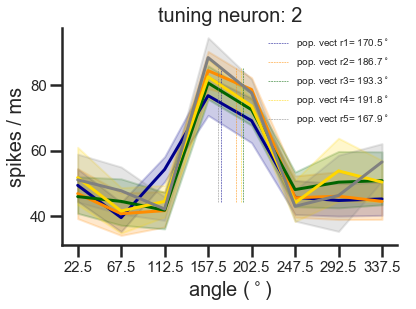

In [503]:
### circular variance per radius

neuron_ = 2

r_colors=['darkblue', 'darkorange', 'darkgreen', 'gold', 'grey']

for idxr, radius_ in enumerate(['r1', 'r2', 'r3', 'r4', 'r5']):
    sns.lineplot(x='angle', y=sp_time, color=r_colors[idxr], 
                 data=df_t.loc[ (df_t['neuron_id']==neuron_) & (df_t['radius']==radius_) ])
    plt.xticks(df_t.angle.unique(), fontsize=15)
    plt.yticks(fontsize=15)
    plt.ylabel('spikes / ms', fontsize=20)
    plt.xlabel('angle ($^\circ$)',  fontsize=20)
    plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
    plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
    plt.gca().get_xaxis().tick_bottom()                                                                                         
    plt.gca().get_yaxis().tick_left()
    plt.gca().tick_params(direction='out') #direction
    plt.title('tuning neuron: ' + str(neuron_), fontsize=20)


    # #### population vector1 (all)
    angles_rad = df_t.loc[(df_t['neuron_id']==neuron_) & (df_t['radius']==radius_), 'angle'].values
    angles_rad = np.radians(angles_rad)
    sps_stimp = df_t.loc[(df_t['neuron_id']==neuron_) & (df_t['radius']==radius_), sp_time].values

    R = np.sum(np.dot(sps_stimp, np.exp(1j*angles_rad)))/np.sum(sps_stimp)
    angle_decoded = np.degrees(np.angle(R))
    m = abs(R)
    circ_var = np.sqrt(-2*np.log(m))
    print(radius_, circ_var)

    if angle_decoded<0:
            angle_decoded = 360+angle_decoded


    #print(angle_decoded) 



    inf, sup= [df_t.loc[df_t['neuron_id']==neuron_][sp_time].mean()- 0.5*df_t.loc[df_t['neuron_id']==neuron_][sp_time].std(), 
     df_t.loc[df_t['neuron_id']==neuron_][sp_time].mean()+ 1.5*df_t.loc[df_t['neuron_id']==neuron_][sp_time].std()]        

    plt.plot([angle_decoded, angle_decoded], [inf, sup], color=r_colors[idxr], 
             linestyle='--', linewidth=0.5, 
             label= 'pop. vect '+ radius_ + '= '+ str(round(angle_decoded,1)) + '$^\circ$' )




plt.legend(loc=1,frameon=False, fontsize=10)


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


r1 2.8392870628180416
r5 2.1671590578272855


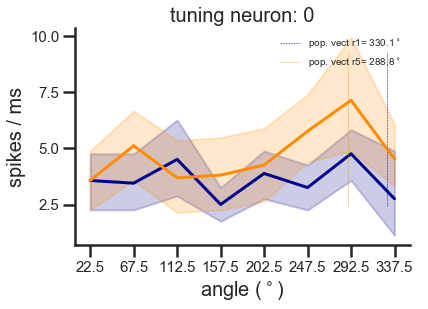

r1 1.7714734000607946
r5 1.5760430895908029


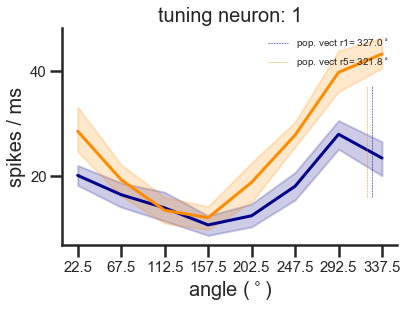

r1 2.076253609508367
r5 2.0964793480649884


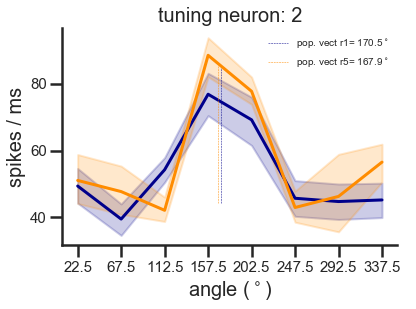

r1 2.597330901112962
r5 2.1019523325111185


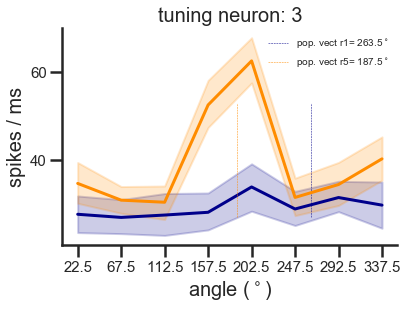

r1 2.535293818486175
r5 2.829908151110566


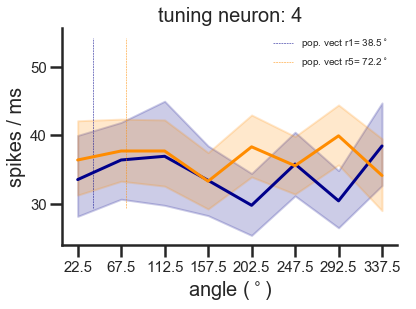

r1 2.3658301903872587
r5 2.2934126022987464


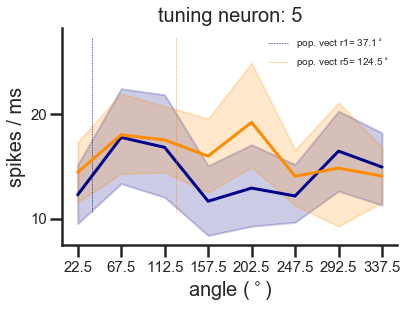

r1 1.7230705693306954
r5 1.7186579535323856


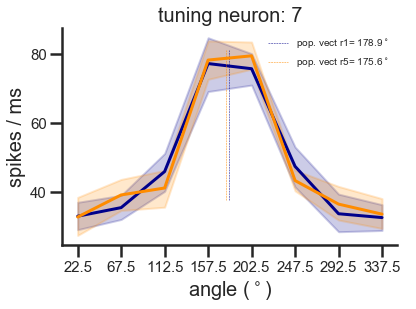

r1 2.1128674023927205
r5 1.9165430679710642


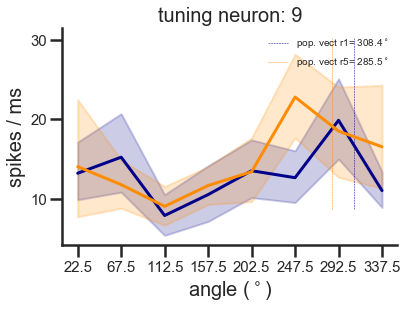

r1 1.825160148635098
r5 1.320494099529705


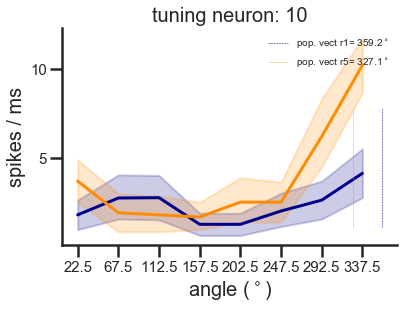

r1 2.218293634340011
r5 2.098017589893379


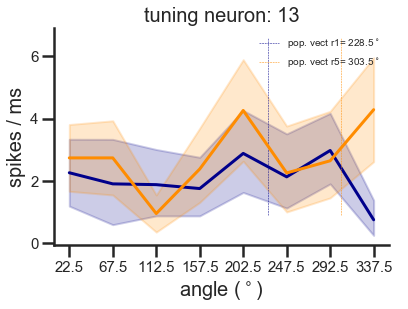

r1 2.868744560190967
r5 1.9744290588282667


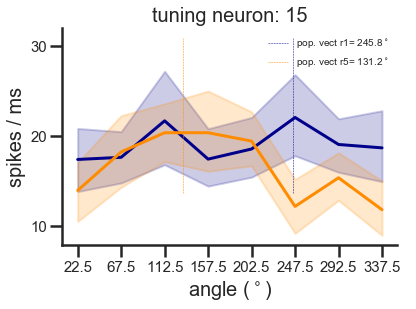

r1 3.1342283015240224
r5 2.5245445687002452


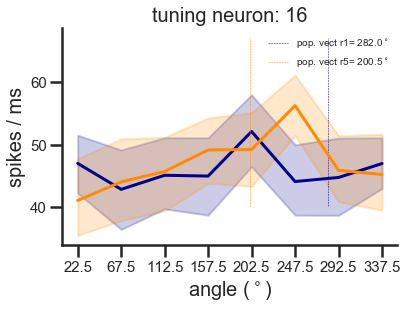

r1 2.430641896020264
r5 2.2303941862430317


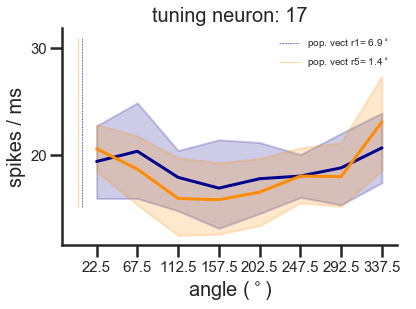

r1 2.299532411719806
r5 1.6553724404391585


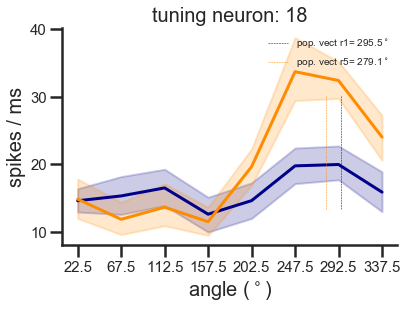

r1 2.590175117496989
r5 2.130934234942325


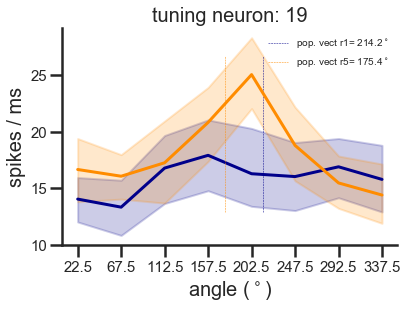

r1 2.206499771489415
r5 2.3550959321051472


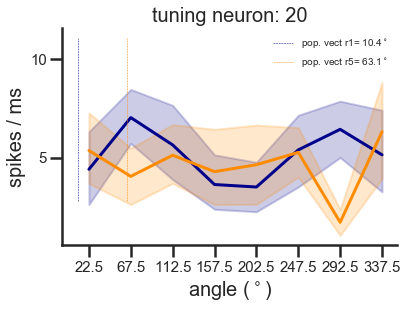

r1 2.2962800037846702
r5 2.7909322512815926


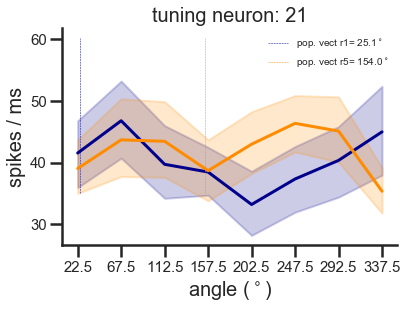

r1 3.125458354335677
r5 2.524394109431667


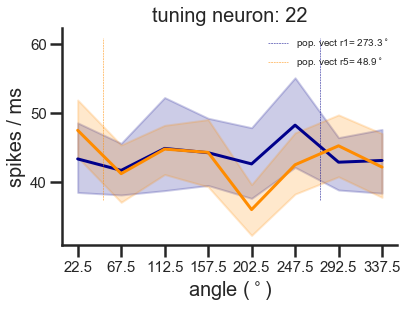

r1 2.5749860152103743
r5 2.3924644325488598


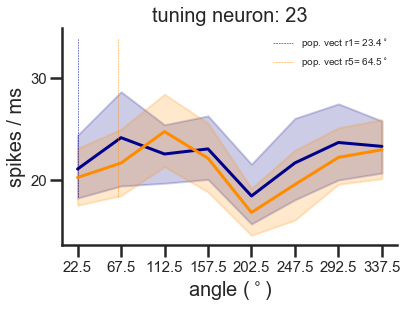

r1 2.2222875996060796
r5 2.370498891348572


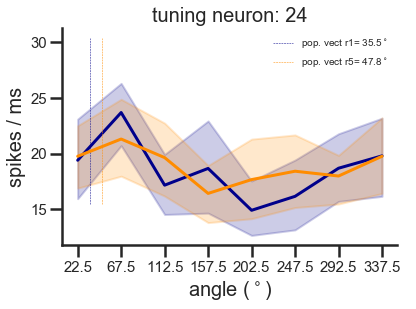

r1 2.3458945703718737
r5 2.528056633534509


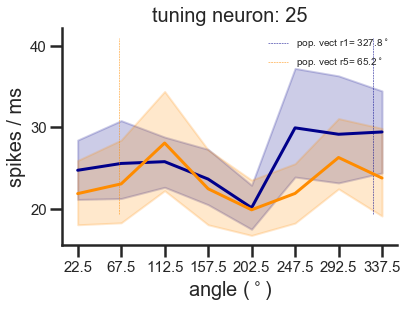

r1 2.4355859997385267
r5 2.4010435392618112


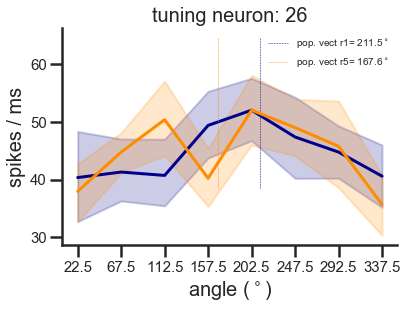

r1 2.3318107878424517
r5 2.060998138658365


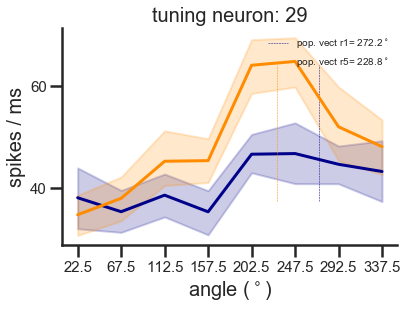

r1 2.352683171754619
r5 2.219823669316414


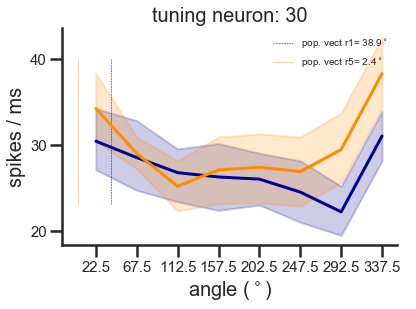

r1 3.198777198249199
r5 2.328159699037564


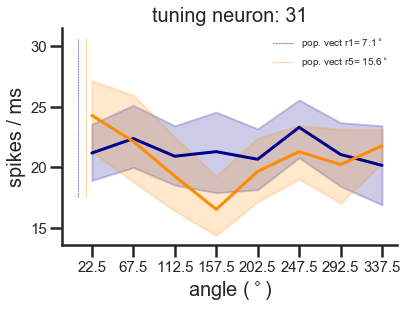

r1 2.7741211262015786
r5 2.4718732949865454


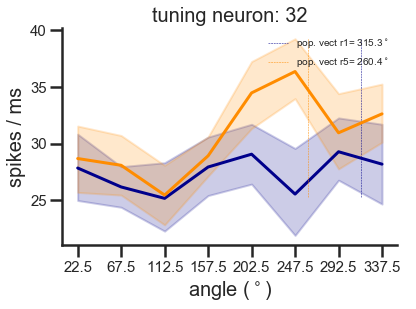

r1 2.6631022277926117
r5 2.690857412863403


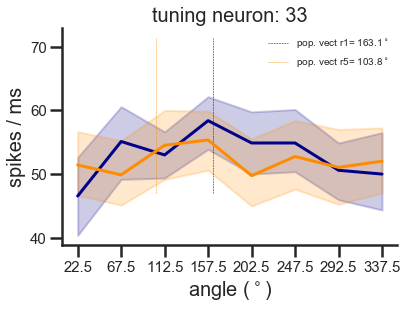

r1 3.118961809003699
r5 2.492712953854109


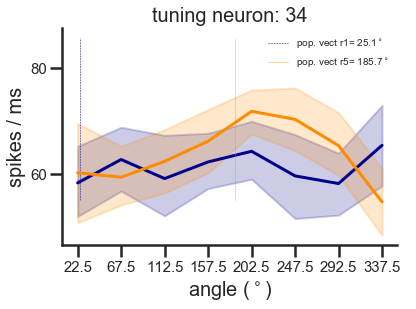

r1 2.6671070293821963
r5 2.4087729980386148


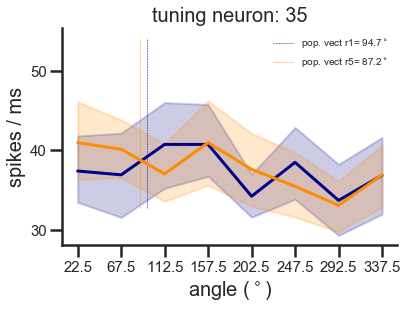

r1 2.2299549504487097
r5 1.8628440757262528


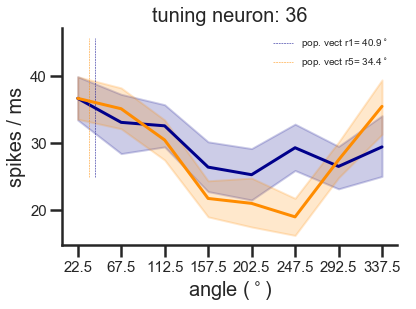

r1 2.844830597576866
r5 2.4510165881192942


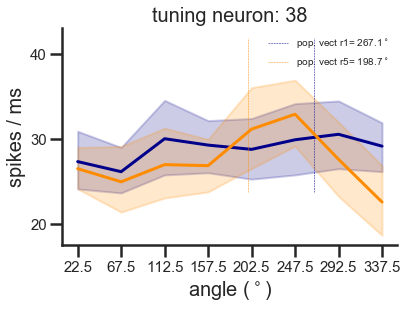

r1 2.2939344310249883
r5 2.5127344189721934


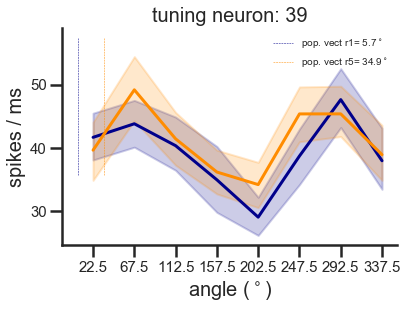

r1 2.4721231076382897
r5 1.9312813752003755


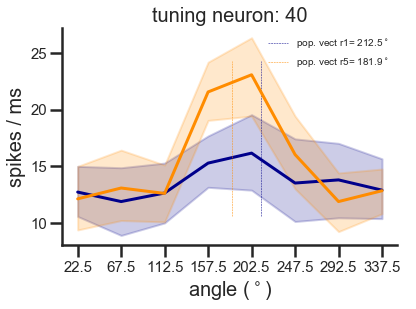

r1 2.190192184408249
r5 1.9048373512332295


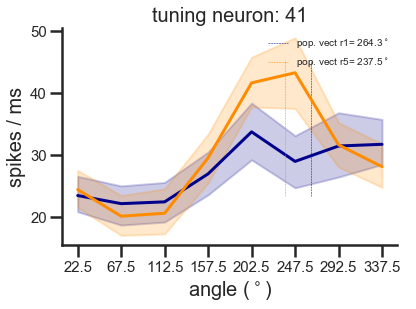

r1 2.101861085293911
r5 1.7966942165471855


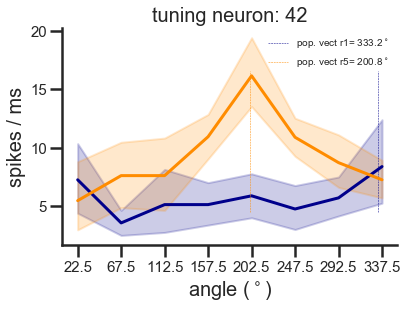

r1 1.8724363316401216
r5 1.7307000980969054


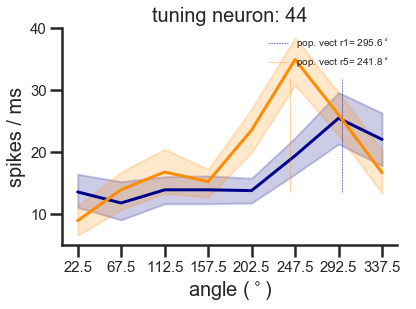

r1 2.571683475558006
r5 2.3107894266394


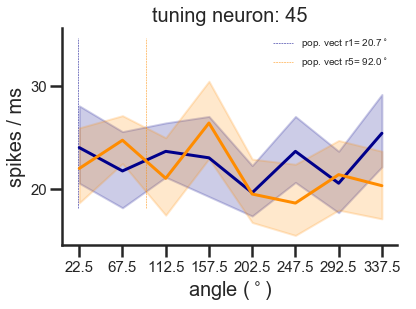

r1 2.3943402022102447
r5 2.2388050589481496


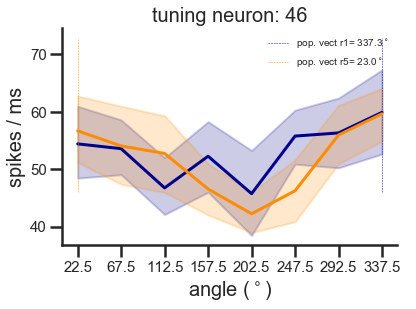

r1 1.806848078395568
r5 1.6424756132401124


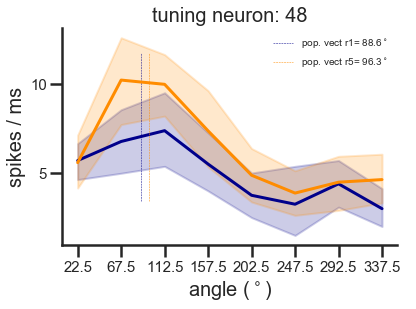

r1 2.5039005846007374
r5 2.632427138375591


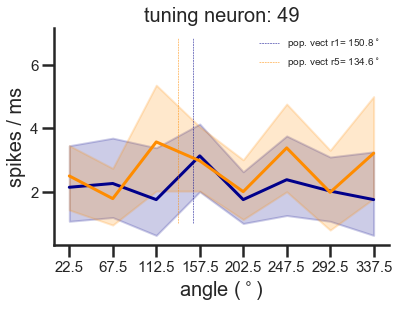

r1 2.556586724052114
r5 2.32998488895199


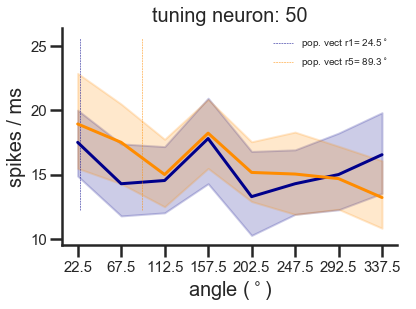

r1 2.1473654343806015
r5 2.9041228875697933


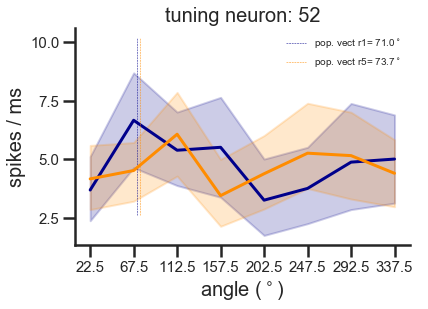

r1 2.9224144919547297
r5 2.3698197107961887


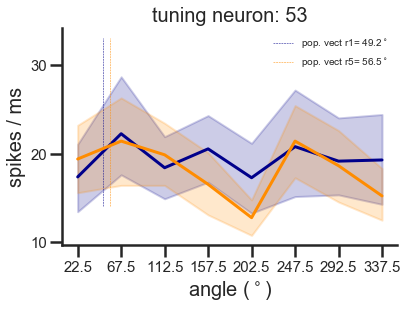

r1 1.7602107340666913
r5 2.043489564199533


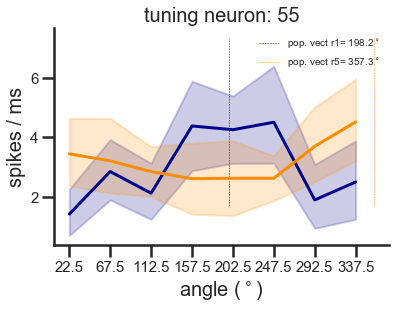

r1 2.683861953581188
r5 2.534585422672438


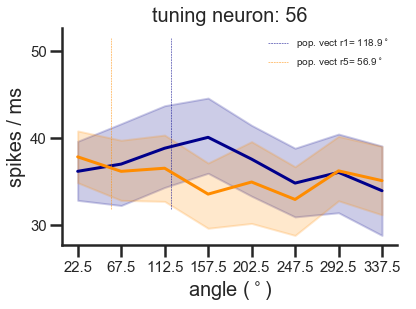

r1 2.650871952827885
r5 2.3334358036373617


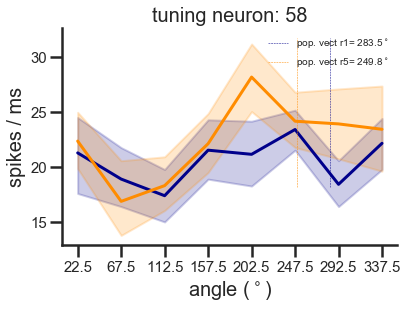

r1 2.601426713336746
r5 2.6201383197588157


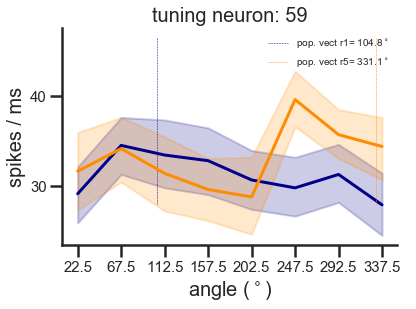

r1 1.8854702051942445
r5 1.7045722538890187


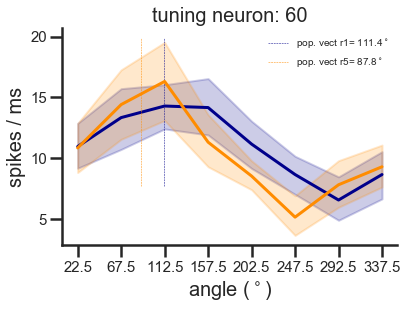

r1 1.8026868937032285
r5 1.7578534611486742


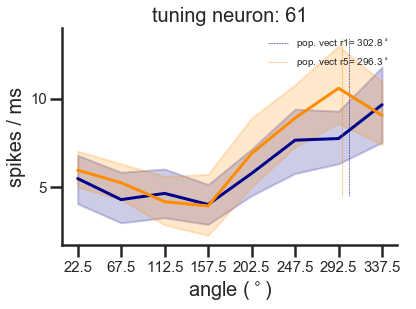

r1 2.2170880074208146
r5 2.469862287143938


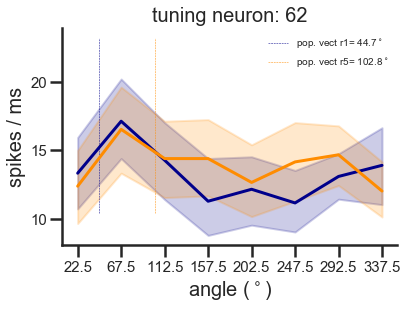

r1 2.589877662300891
r5 2.176865677844933


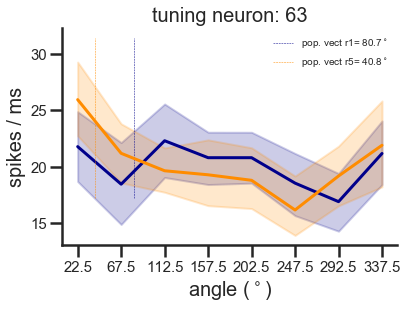

r1 2.4100156587041885
r5 2.082223163184786


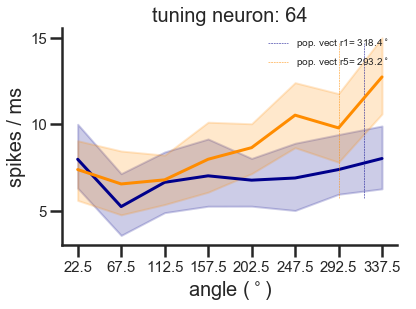

r1 2.413699172709692
r5 2.625500941944372


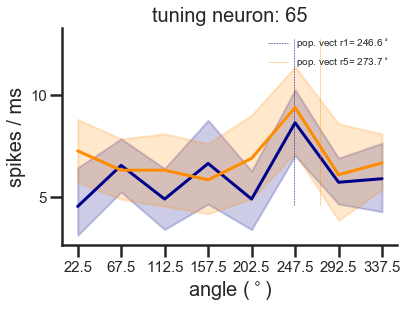

r1 2.631040088591417
r5 2.2688429684285496


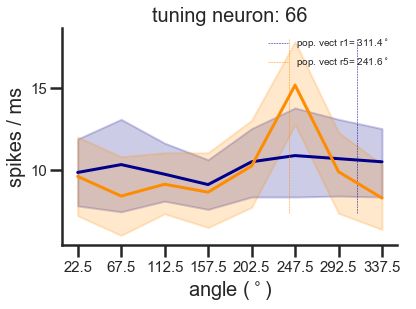

r1 3.0168108998944008
r5 2.2277786989279806


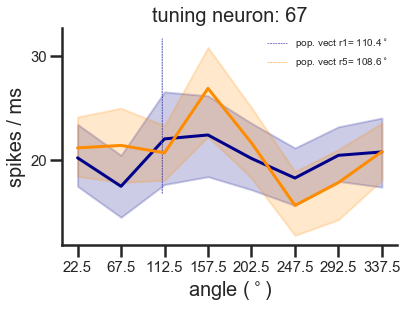

r1 2.1305800879026675
r5 1.993988484333202


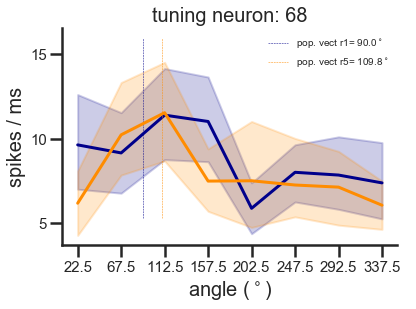

r1 2.2762318613702703
r5 2.2718738665903926


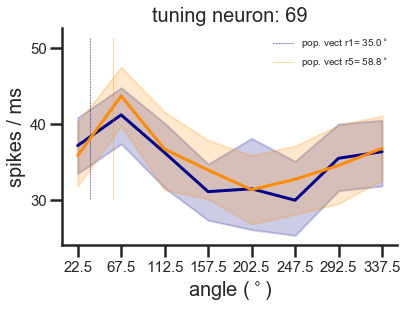

r1 3.029571665237797
r5 2.3206847722710804


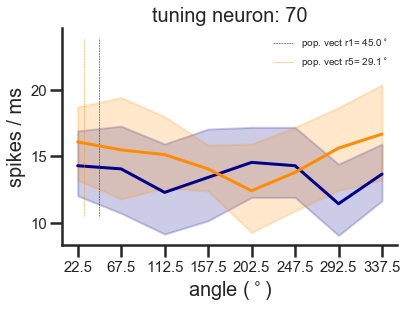

r1 2.477767514375477
r5 2.50146412371069


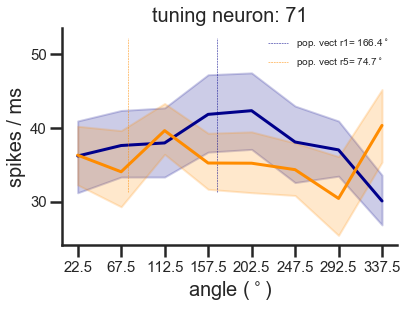

r1 2.6397185372877745
r5 2.129738248613329


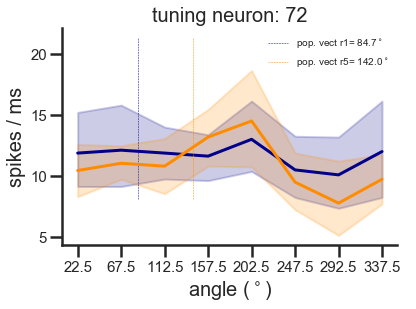

r1 1.989564823280204
r5 1.989460465799657


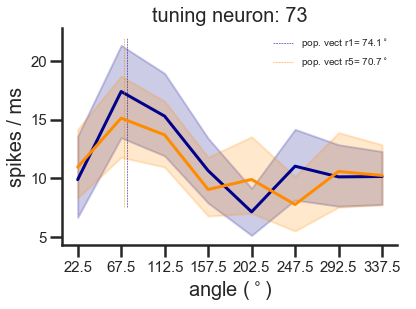

r1 2.563057477605722
r5 2.4815999998983673


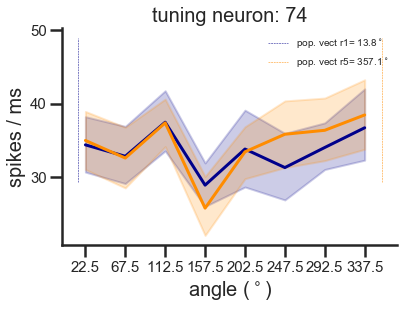

r1 2.6469034271908445
r5 2.8036982303098306


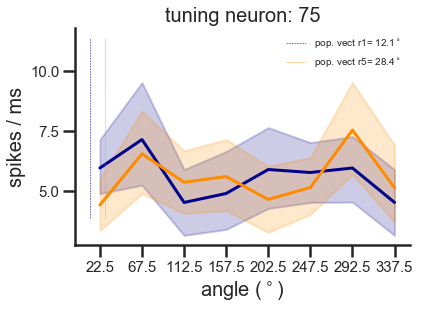

r1 2.2973472283214744
r5 2.5521338176865935


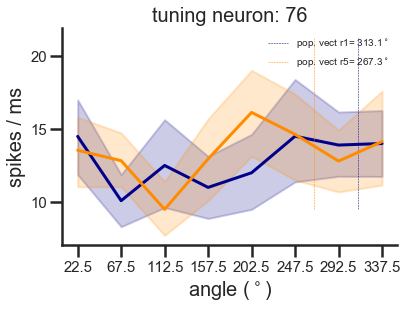

r1 1.7356498449078028
r5 1.3443747860000377


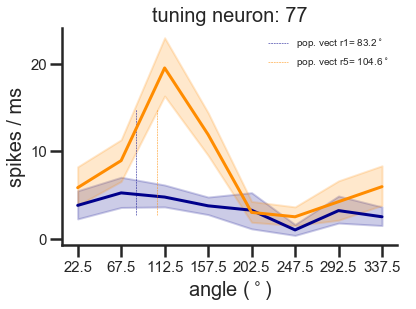

r1 1.9304361727047805
r5 2.0006504639957545


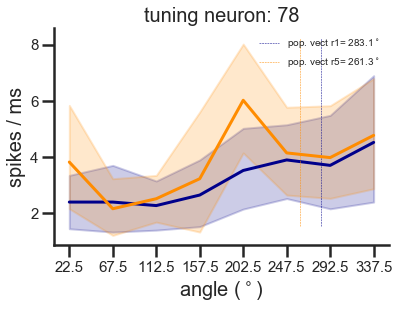

r1 1.8736989611266164
r5 2.0273434605797527


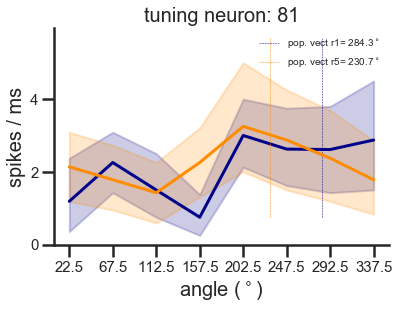

r1 2.4986192759246046
r5 2.114288476709034


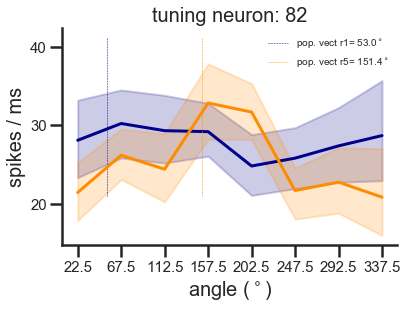

r1 2.301357307072326
r5 2.277173327906647


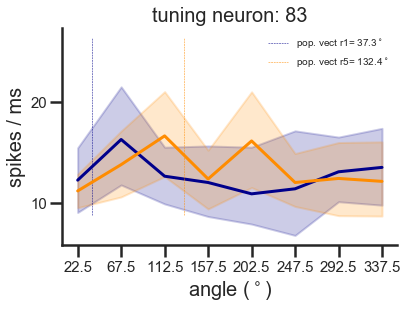

r1 2.255005424938958
r5 2.0733635359065397


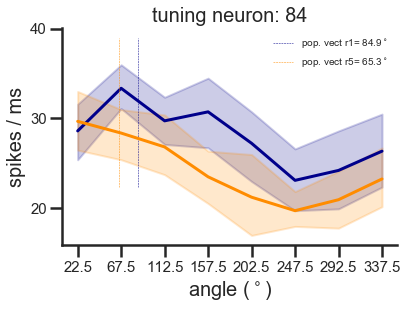

r1 2.6411032754272115
r5 2.136846804318914


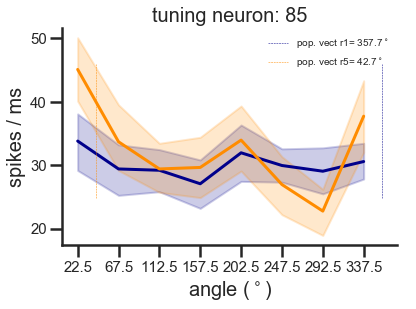

r1 2.453769385515271
r5 2.1806355609522337


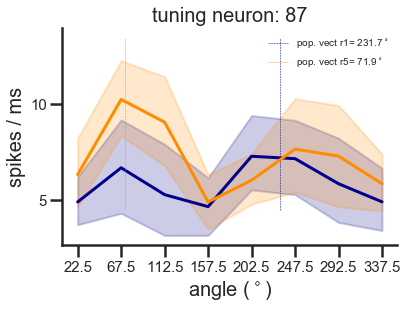

r1 3.0482587105573264
r5 3.134188488826343


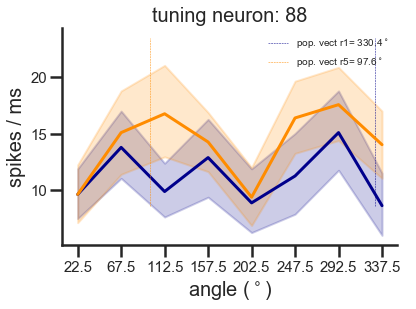

r1 2.1353043533619678
r5 2.0835269006945385


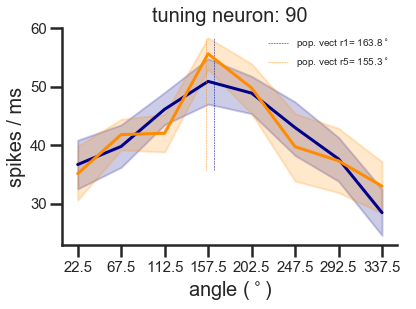

r1 1.6776421117162146
r5 1.6956152260491064


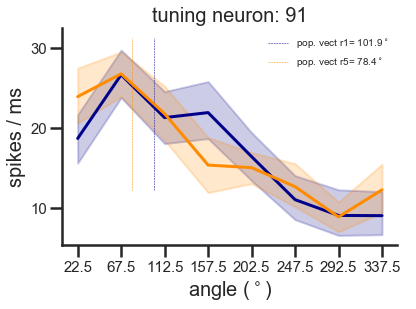

r1 2.6006165719389798
r5 2.1438585364948946


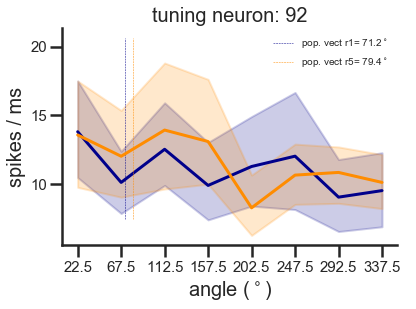

r1 2.143220458612987
r5 1.9722352518642678


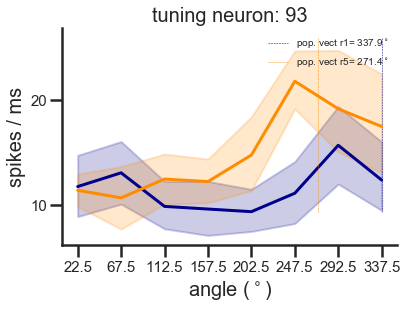

r1 2.471945317937536
r5 2.6933888339421865


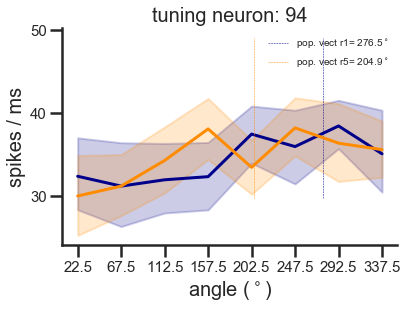

r1 1.7822617407860442
r5 2.0465700976054935


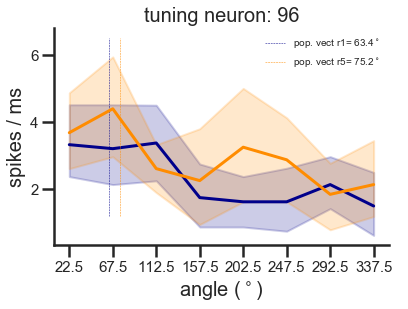

r1 2.2154096841970405
r5 2.244814293403873


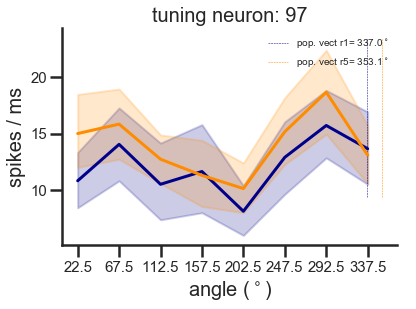

r1 1.6785864667328334
r5 1.8069589719184034


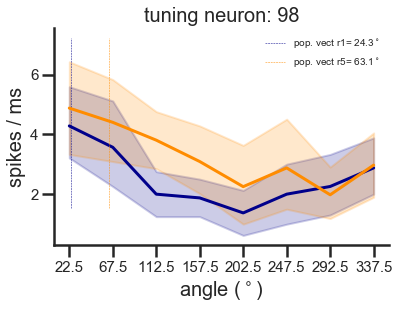

r1 2.880300121267241
r5 2.120727392678935


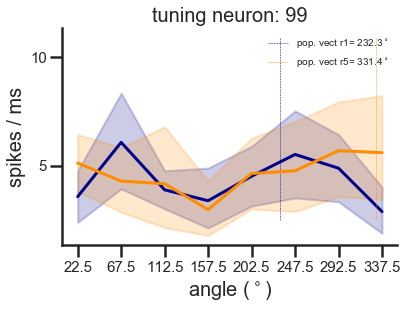

r1 2.56199926293787
r5 2.2814311487732764


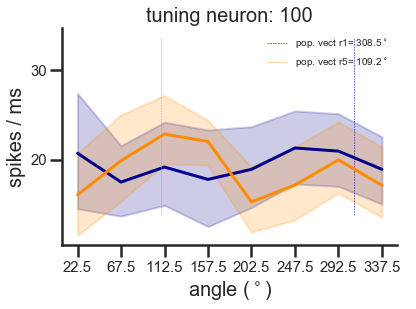

r1 2.250674112428371
r5 2.5234720095460834


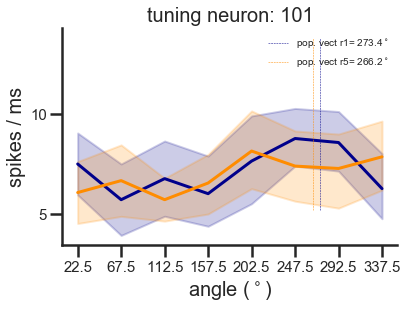

r1 1.9379954500980223
r5 2.0661456070415576


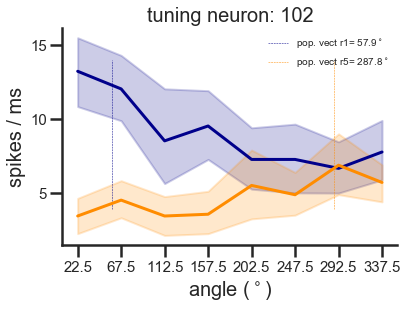

r1 2.7348389942633156
r5 2.4729647049594488


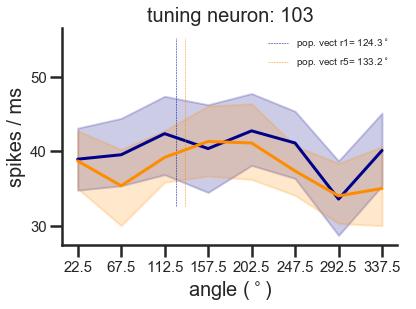

r1 1.927517343914126
r5 1.9144278508232941


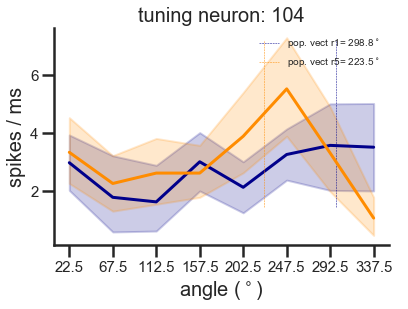

r1 2.5182254231414736
r5 2.085851970425447


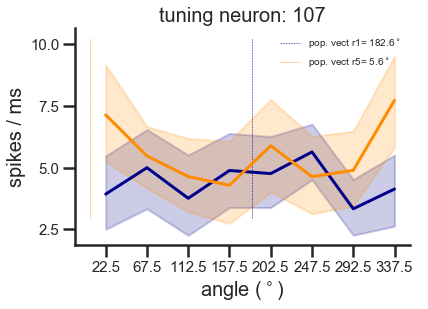

r1 2.0600565348763777
r5 2.196877316632522


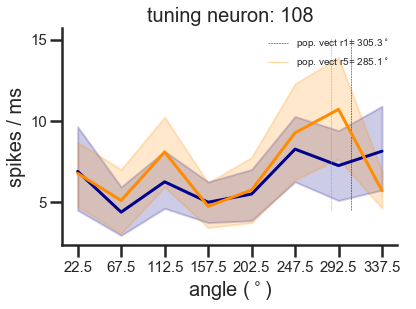

r1 1.8375853191874003
r5 1.9206538675839657


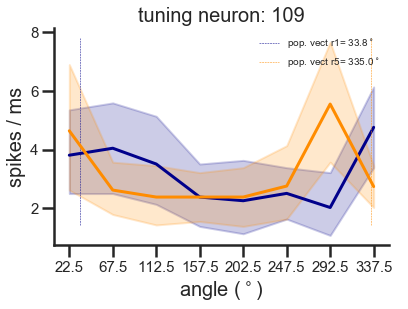

r1 2.027410285925769
r5 2.0661152002028023


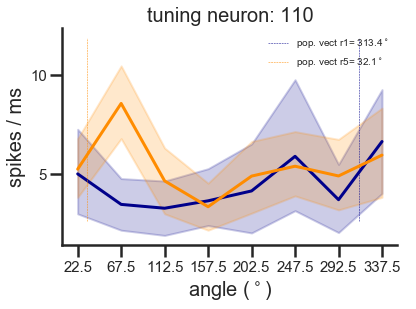

r1 2.337785505828973
r5 2.244383764774425


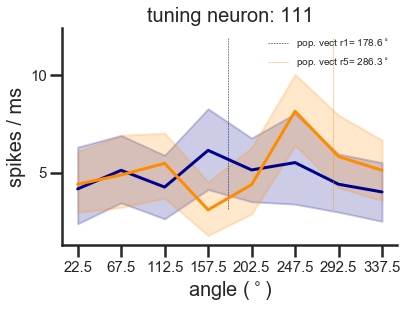

r1 2.162845212328354
r5 2.029721817955384


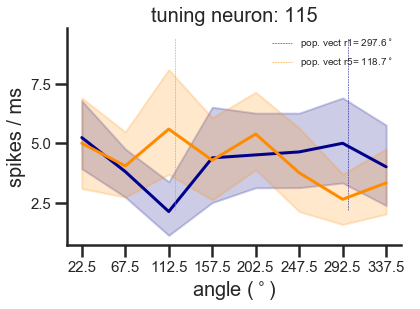

r1 2.0737566669158967
r5 1.8486922115853008


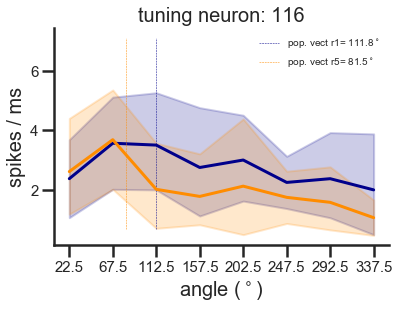

r1 1.9510166059556258
r5 1.9764509169126274


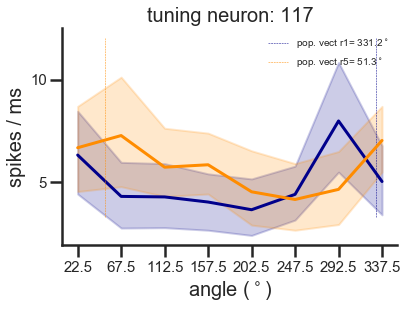

r1 2.315316259244831
r5 2.257943218023177


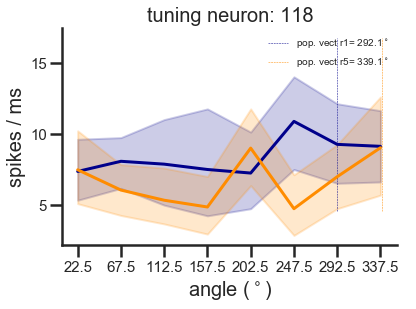

r1 2.4725892119750537
r5 2.256666594235801


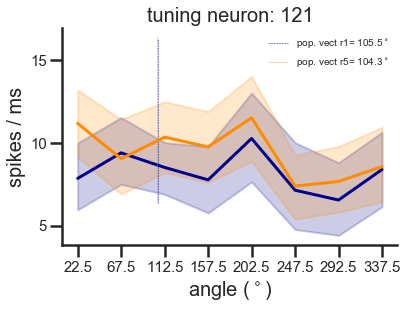

r1 2.2555247188775724
r5 1.8207097084788444


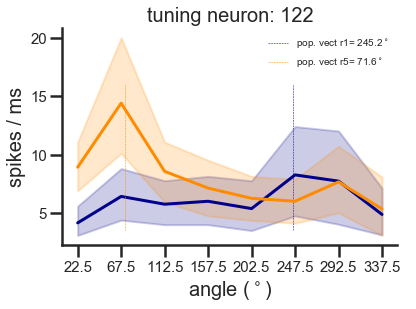

r1 2.4985970071537964
r5 2.1537256709689174


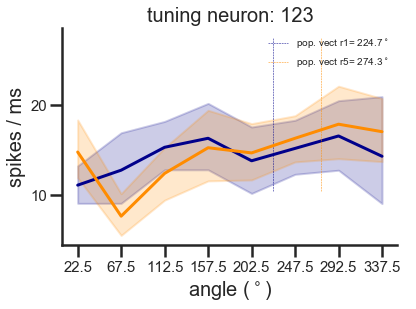

r1 2.4896848894224433
r5 2.0597280049247457


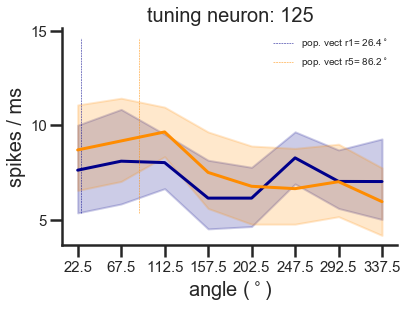

In [504]:
r_colors=['darkblue', 'darkorange', 'darkgreen', 'gold', 'grey']

for n in df_t.neuron_id.unique()[:100]:
    plt.figure()
    for idxr, radius_ in enumerate(['r1', 'r5']):        
        sns.lineplot(x='angle', y=sp_time, color=r_colors[idxr], 
                     data=df_t.loc[ (df_t['neuron_id']==n) & (df_t['radius']==radius_) ])
        plt.xticks(df_t.angle.unique(), fontsize=15)
        plt.yticks(fontsize=15)
        plt.ylabel('spikes / ms', fontsize=20)
        plt.xlabel('angle ($^\circ$)',  fontsize=20)
        plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
        plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
        plt.gca().get_xaxis().tick_bottom()                                                                                         
        plt.gca().get_yaxis().tick_left()
        plt.gca().tick_params(direction='out') #direction
        plt.title('tuning neuron: ' + str(n), fontsize=20)


        # #### population vector1 (all)
        angles_rad = df_t.loc[(df_t['neuron_id']==n) & (df_t['radius']==radius_), 'angle'].values
        angles_rad = np.radians(angles_rad)
        sps_stimp = df_t.loc[(df_t['neuron_id']==n) & (df_t['radius']==radius_), sp_time].values

        R = np.sum(np.dot(sps_stimp, np.exp(1j*angles_rad)))/np.sum(sps_stimp)
        angle_decoded = np.degrees(np.angle(R))
        m = abs(R)
        circ_var = np.sqrt(-2*np.log(m))
        print(radius_, circ_var)

        if angle_decoded<0:
                angle_decoded = 360+angle_decoded


        #print(angle_decoded) 



        inf, sup= [df_t.loc[df_t['neuron_id']==n][sp_time].mean()- 0.5*df_t.loc[df_t['neuron_id']==n][sp_time].std(), 
         df_t.loc[df_t['neuron_id']==n][sp_time].mean()+ 1.5*df_t.loc[df_t['neuron_id']==n][sp_time].std()]        

        plt.plot([angle_decoded, angle_decoded], [inf, sup], color=r_colors[idxr], 
                 linestyle='--', linewidth=0.5, 
                 label= 'pop. vect '+ radius_ + '= '+ str(round(angle_decoded,1)) + '$^\circ$' )




    plt.legend(loc=1,frameon=False, fontsize=10)
    plt.show()

In [505]:
frames=[]
for n in df_t.neuron_id.unique():
    for idxr, radius_ in enumerate(['r1', 'r2', 'r3', 'r4', 'r5']):        
        # #### population vector1 (all)
        angles_rad = df_t.loc[(df_t['neuron_id']==n) & (df_t['radius']==radius_), 'angle'].values
        angles_rad = np.radians(angles_rad)
        sps_stimp = df_t.loc[(df_t['neuron_id']==n) & (df_t['radius']==radius_), sp_time].values
        R = np.sum(np.dot(sps_stimp, np.exp(1j*angles_rad)))/np.sum(sps_stimp)
        m = abs(R)
        circ_var = np.sqrt(-2*np.log(m))
        frames.append([n, radius_, circ_var])

circ_dists=pd.DataFrame(frames)
circ_dists.columns=['neuron', 'radius', 'circular std.']
circ_dists.head()

neuron radius  circular std.
0       0     r1       2.839287
1       0     r2       1.904574
2       0     r3       2.447557
3       0     r4       1.942942
4       0     r5       2.167159

                            OLS Regression Results                            
Dep. Variable:                    std   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     18.12
Date:                Fri, 14 May 2021   Prob (F-statistic):           2.43e-05
Time:                        19:32:43   Log-Likelihood:                -185.99
No. Observations:                 565   AIC:                             376.0
Df Residuals:                     563   BIC:                             384.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3924      0.033     71.974      0.0

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


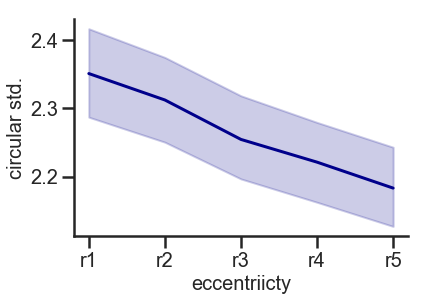

In [506]:
sns.lineplot(x='radius', y='circular std.', data=circ_dists, color='darkblue')
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('circular std.', fontsize=20)
plt.xlabel('eccentriicty',  fontsize=20)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='out') #direction
#plt.title('tuning neuron: ' + str(n), fontsize=20)

circ_dists['std'] = circ_dists['circular std.'].copy() 
circ_dists['r'] = circ_dists['radius'].replace(['r1', 'r2', 'r3', 'r4', 'r5'], [1,2,3,4,5])
result = smf.ols(formula="std ~ r", data=circ_dists).fit()
print(result.summary())


In [480]:
#### Un poco unfair cogerlas todas no??? ya que no todos los radius estan en el RF! 